In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [180]:
df1= pd.read_csv('SCMS_Delivery_History_Dataset.csv')
df= df1.copy()

In [181]:
df.head()

,ID,Project_Code,PQ,PO/SO,ASN/DN,Country,Managed_By,Fulfill_Via,Vendor_INCO_Term,Shipment_Mode,...,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,Manufacturing_Site,First_Line_Designation,Weight_(Kilograms),Freight_Cost_(USD),Line_Item_Insurance_(USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


## Project Details:
- **ID:** Unique identifier for the project.
- **Project Code:** Code assigned to the project.
- **PQ #:** Prequalification number.
- **PO/SO #:** Purchase order or sales order number.
- **ASN/DN #:** Advanced shipping notice or delivery note number.
- **Country:** The country associated with the project.
- **Managed By:** Entity or individual responsible for managing the project.
- **Product Group:** Categorization of products within the project.

## Product Details:
- **Sub-Classification:** Further categorization of the product.
- **Item Description:** Detailed description of the product.
- **Molecule/Test Type:** The chemical composition or type of test for the product.
- **Brand:** Brand name associated with the product.
- **Dosage:** Amount of medicine or substance prescribed.
- **Dosage Form:** The form in which the product is administered.
- **Unit of Measure (Per Pack):** Measurement unit for the product.
- **Line Item Quantity:** Quantity of items in a line.
- **Line Item Value:** Monetary value associated with the line item.
- **Pack Price:** Price per pack of the product.
- **Unit Price:** Price per unit of the product.
- **Weight (Kilograms):** Weight of the product in kilograms.
- **Freight Cost (USD):** Cost of freight in U.S. dollars.
- **Line Item Insurance (USD):** Insurance cost for the line item in U.S. dollars.

## Shipment Details:
- **Fulfill Via:** Method or channel through which the order is fulfilled.
- **Shipment Mode:** Mode of transportation for the shipment.
- **Vendor:** Supplier or vendor responsible for providing the products.
- **Vendor INCO Term:** International Commercial Terms related to the vendor.
- **Manufacturing Site:** Location where the products are manufactured.

## Date Columns:
- **PQ First Sent to Client Date:** Date when the prequalification information was first sent to the client.
- **PO Sent to Vendor Date:** Date when the purchase order was sent to the vendor.
- **Scheduled Delivery Date:** Planned date for the delivery of the products.
- **Delivered to Client Date:** Date when the products were delivered to the client.
- **Delivery Recorded Date:** Date when the delivery was officially recorded.


Rename Columns

In [182]:
df.columns = df.columns.str.replace(' ', '_')

In [183]:
df.columns

Index(['ID', 'Project_Code', 'PQ', 'PO/SO', 'ASN/DN', 'Country', 'Managed_By',
       'Fulfill_Via', 'Vendor_INCO_Term', 'Shipment_Mode',
       'PQ_First_Sent_to_Client_Date', 'PO_Sent_to_Vendor_Date',
       'Scheduled_Delivery_Date', 'Delivered_to_Client_Date',
       'Delivery_Recorded_Date', 'Product_Group', 'Sub_Classification',
       'Vendor', 'Item_Description', 'Molecule/Test_Type', 'Brand', 'Dosage',
       'Dosage_Form', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity',
       'Line_Item_Value', 'Pack_Price', 'Unit_Price', 'Manufacturing_Site',
       'First_Line_Designation', 'Weight_(Kilograms)', 'Freight_Cost_(USD)',
       'Line_Item_Insurance_(USD)'],
      dtype='object')

In [184]:
df.shape

(10324, 33)

In [185]:
df.dtypes

ID                                int64
Project_Code                     object
PQ                               object
PO/SO                            object
ASN/DN                           object
Country                          object
Managed_By                       object
Fulfill_Via                      object
Vendor_INCO_Term                 object
Shipment_Mode                    object
PQ_First_Sent_to_Client_Date     object
PO_Sent_to_Vendor_Date           object
Scheduled_Delivery_Date          object
Delivered_to_Client_Date         object
Delivery_Recorded_Date           object
Product_Group                    object
Sub_Classification               object
Vendor                           object
Item_Description                 object
Molecule/Test_Type               object
Brand                            object
Dosage                           object
Dosage_Form                      object
Unit_of_Measure_(Per_Pack)        int64
Line_Item_Quantity                int64


Data Overview

In [186]:
project_details = ['ID', 'Project_Code', 'PQ_#', 'PO_/_SO_#', 'ASN/DN_#', 'Country', 'Managed_By', 'Product_Group']

product_details = ['Sub_Classification', 'Item_Description', 'Molecule/Test_Type', 'Brand', 'Dosage',
                   'Dosage_Form', 'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity', 'Line_Item_Value',
                   'Pack_Price', 'Unit_Price', 'Weight_(Kilograms)', 'Freight_Cost_(USD)', 'Line_Item_Insurance_(USD)']

shipment = ['Fulfill_Via', 'Shipment_Mode', 'Vendor', 'Vendor_INCO_Term', 'Manufacturing_Site']

date_column = ['PQ_First_Sent_to_Client_Date', 'PO_Sent_to_Vendor_Date', 'Scheduled_Delivery_Date',
               'Delivered_to_Client_Date', 'Delivery_Recorded_Date']


Fucntions 

In [187]:
def plot_categorical_distribution(dataframe, column_name):
    """
    Plot the percentage distribution of a categorical column using a bar plot.

    Parameters:
    - dataframe: pandas DataFrame
    - column_name: str, the name of the categorical column to be plotted

    Returns:
    - None (displays the bar plot)
    """
    # Calculate the percentage distribution of the categorical column
    column_percentage = dataframe[column_name].value_counts(normalize=True) * 100

    plt.figure(figsize=(10, 6))
    sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')
    plt.title(f'{column_name} Percentage Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()

    # Print the percentages for each category
    for category, percentage in column_percentage.items():
        print(f"{column_name}: {category}, Percentage: {percentage:.2f}%")

In [188]:
def plot_stacked_bar_plot(data, category1, category2, normalize=True, colormap='viridis', show_percentages=True):
    """
    Display a stacked bar plot for the cross-tabulation of two categorical variables.

    Parameters:
    - data: pandas DataFrame
    - category1: Label of the first categorical column
    - category2: Label of the second categorical column
    - normalize: Whether to normalize the values (default is True)
    - colormap: Colormap for the plot (default is 'husl')
    - show_percentages: Whether to show percentages on the plot (default is True)

    Returns:
    - None (displays the plot)
    """
    # Create cross-tabulation
    if normalize:
        crosstab_data = pd.crosstab(data[category1], data[category2], normalize='all') * 100
    else:
        crosstab_data = pd.crosstab(data[category1], data[category2])

    # Plotting
    fig, ax = plt.subplots(figsize=(16, 10))  # Adjust the size as needed
    crosstab_data.plot.bar(stacked=True, cmap=colormap, ax=ax)

    # Set plot labels and title
    plt.title(f'Stacked Bar Plot: {category1} vs. {category2} {"(Percentage)" if normalize else ""}')
    plt.xlabel(category1)
    plt.ylabel('Percentage' if normalize and show_percentages else 'Count')

    # Rotate x-axis labels
    plt.xticks(rotation=90)

    #Adjust layout to prevent clipping of labels
    plt.subplots_adjust(bottom=0.2)

    # Show the plot
    plt.show()


def plot_categorical_hue(dataframe, x_column, hue_column):
    """
    Plot a percentage distribution of a categorical column with unique values of another column as hue.

    Parameters:
    - dataframe: pandas DataFrame
    - x_column: str, the name of the column to be plotted on the x-axis
    - hue_column: str, the name of the column to be used as hue

    Returns:
    - None (displays the plot)
    """
    # Calculate the percentage distribution of the categorical column with hue
    data_percentage = dataframe.groupby([x_column, hue_column]).size().reset_index(name='count')
    data_percentage['percentage'] = (data_percentage['count'] / data_percentage['count'].sum()) * 100

    plt.figure(figsize=(12, 8))
    sns.barplot(x=x_column, y='percentage', hue=hue_column, data=data_percentage, palette='viridis')
    plt.title(f'{x_column} with {hue_column} as Hue - Percentage Distribution')
    plt.xlabel(x_column)
    plt.ylabel('Percentage')
    plt.show()

    # Print the percentages for each category
    for index, row in data_percentage.iterrows():
        print(f"{x_column}: {row[x_column]}, {hue_column}: {row[hue_column]}, Percentage: {row['percentage']:.2f}%")


def replace_low_frequency_categories(dataframe, column_name, threshold_percentage=1, replace_value='Others'):
    """
    Replace categories with less than a specified percentage occurrence in a column with a specified replacement value.

    Parameters:
    - dataframe: pandas DataFrame
    - column_name: str, the name of the column with categorical data
    - threshold_percentage: float, the threshold percentage for category occurrence (default is 5)
    - replace_value: str, the replacement value for low-frequency categories (default is 'Others')

    Returns:
    - None (modifies the DataFrame in place)
    """
    # Calculate the percentage of each category
    category_percentages = dataframe[column_name].value_counts(normalize=True) * 100

    # Identify categories with less than the threshold percentage
    low_frequency_categories = category_percentages[category_percentages < threshold_percentage].index.tolist()

    # Replace low-frequency categories with the specified replacement value
    dataframe[column_name] = np.where(dataframe[column_name].isin(low_frequency_categories), replace_value, dataframe[column_name])

Nan values

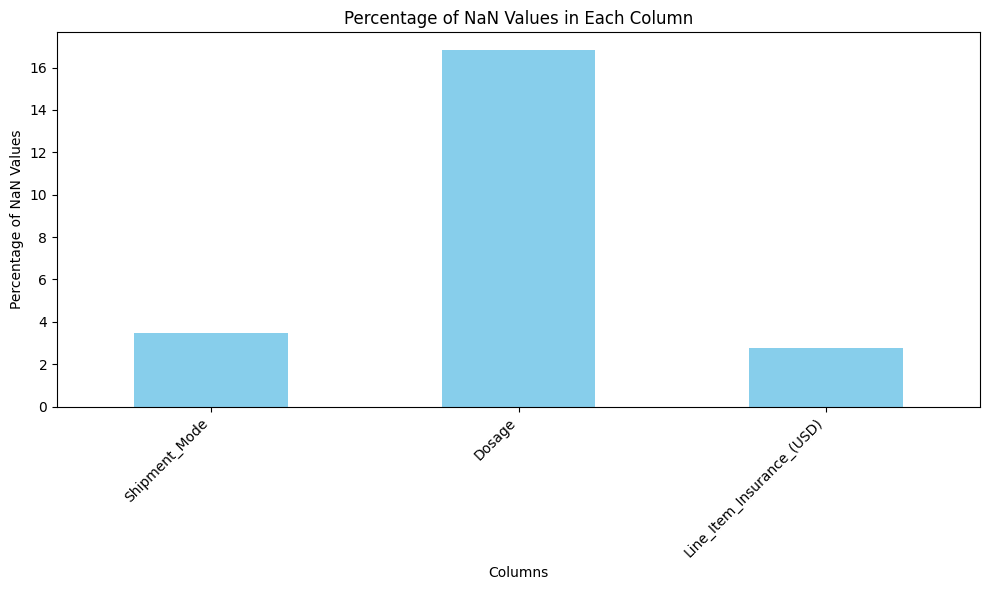

In [189]:
def plot_nan_percentage(df):
    """
    Plot the percentage of NaN values in each column of the DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - None (plots the figure)
    """
    nan_percentage = (df.isnull().mean() * 100).round(2)
    nan_percentage = nan_percentage[nan_percentage > 0]  # Exclude columns with no NaN values

    plt.figure(figsize=(10, 6))
    nan_percentage.plot(kind='bar', color='skyblue')
    plt.title('Percentage of NaN Values in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of NaN Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_nan_percentage(df=df)

In [190]:
def separate_numerical_categorical_columns(df):
    """
    Separate numerical and categorical columns from the DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_columns: list of numerical column names
    - categorical_columns: list of categorical column names
    """
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

    return numerical_columns, categorical_columns


Change Data type

In [191]:
def convert_data_types(df, numerical_cols=None, categorical_cols=None, date_cols=None):
    """
    Convert specified columns in a DataFrame to numerical, categorical, and date data types.
    If no column lists are provided, keep the columns as they are.

    Parameters:
    - df: DataFrame
    - numerical_cols: List of columns to convert to numerical data type (default: None)
    - categorical_cols: List of columns to convert to categorical data type (default: None)
    - date_cols: List of columns to convert to date data type (default: None)

    Returns:
    - df: DataFrame with converted data types
    """
    # Convert to numerical data type if numerical_cols is provided
    if numerical_cols:
        df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

    # Convert to categorical data type if categorical_cols is provided
    if categorical_cols:
        df[categorical_cols] = df[categorical_cols].astype('category')

    # Convert to date data type if date_cols is provided
    if date_cols:
        df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')

    return df
df=convert_data_types(df=df,
                   date_cols=date_column)

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\2800411934.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')
C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\2800411934.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')
C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\2800411934.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_cols] = df[date_cols].apply(pd.to_datetime, errors='coerce')
C:\Users\Hitesh\AppData\Local\T

In [192]:
numerical_columns,categorical_columns=separate_numerical_categorical_columns(df)

In [193]:
numerical_columns

['ID',
 'Unit_of_Measure_(Per_Pack)',
 'Line_Item_Quantity',
 'Line_Item_Value',
 'Pack_Price',
 'Unit_Price',
 'Line_Item_Insurance_(USD)']

In [194]:
categorical_columns

['Project_Code',
 'PQ',
 'PO/SO',
 'ASN/DN',
 'Country',
 'Managed_By',
 'Fulfill_Via',
 'Vendor_INCO_Term',
 'Shipment_Mode',
 'Product_Group',
 'Sub_Classification',
 'Vendor',
 'Item_Description',
 'Molecule/Test_Type',
 'Brand',
 'Dosage',
 'Dosage_Form',
 'Manufacturing_Site',
 'First_Line_Designation',
 'Weight_(Kilograms)',
 'Freight_Cost_(USD)']

Histoplot Distribution of Numerical Columns

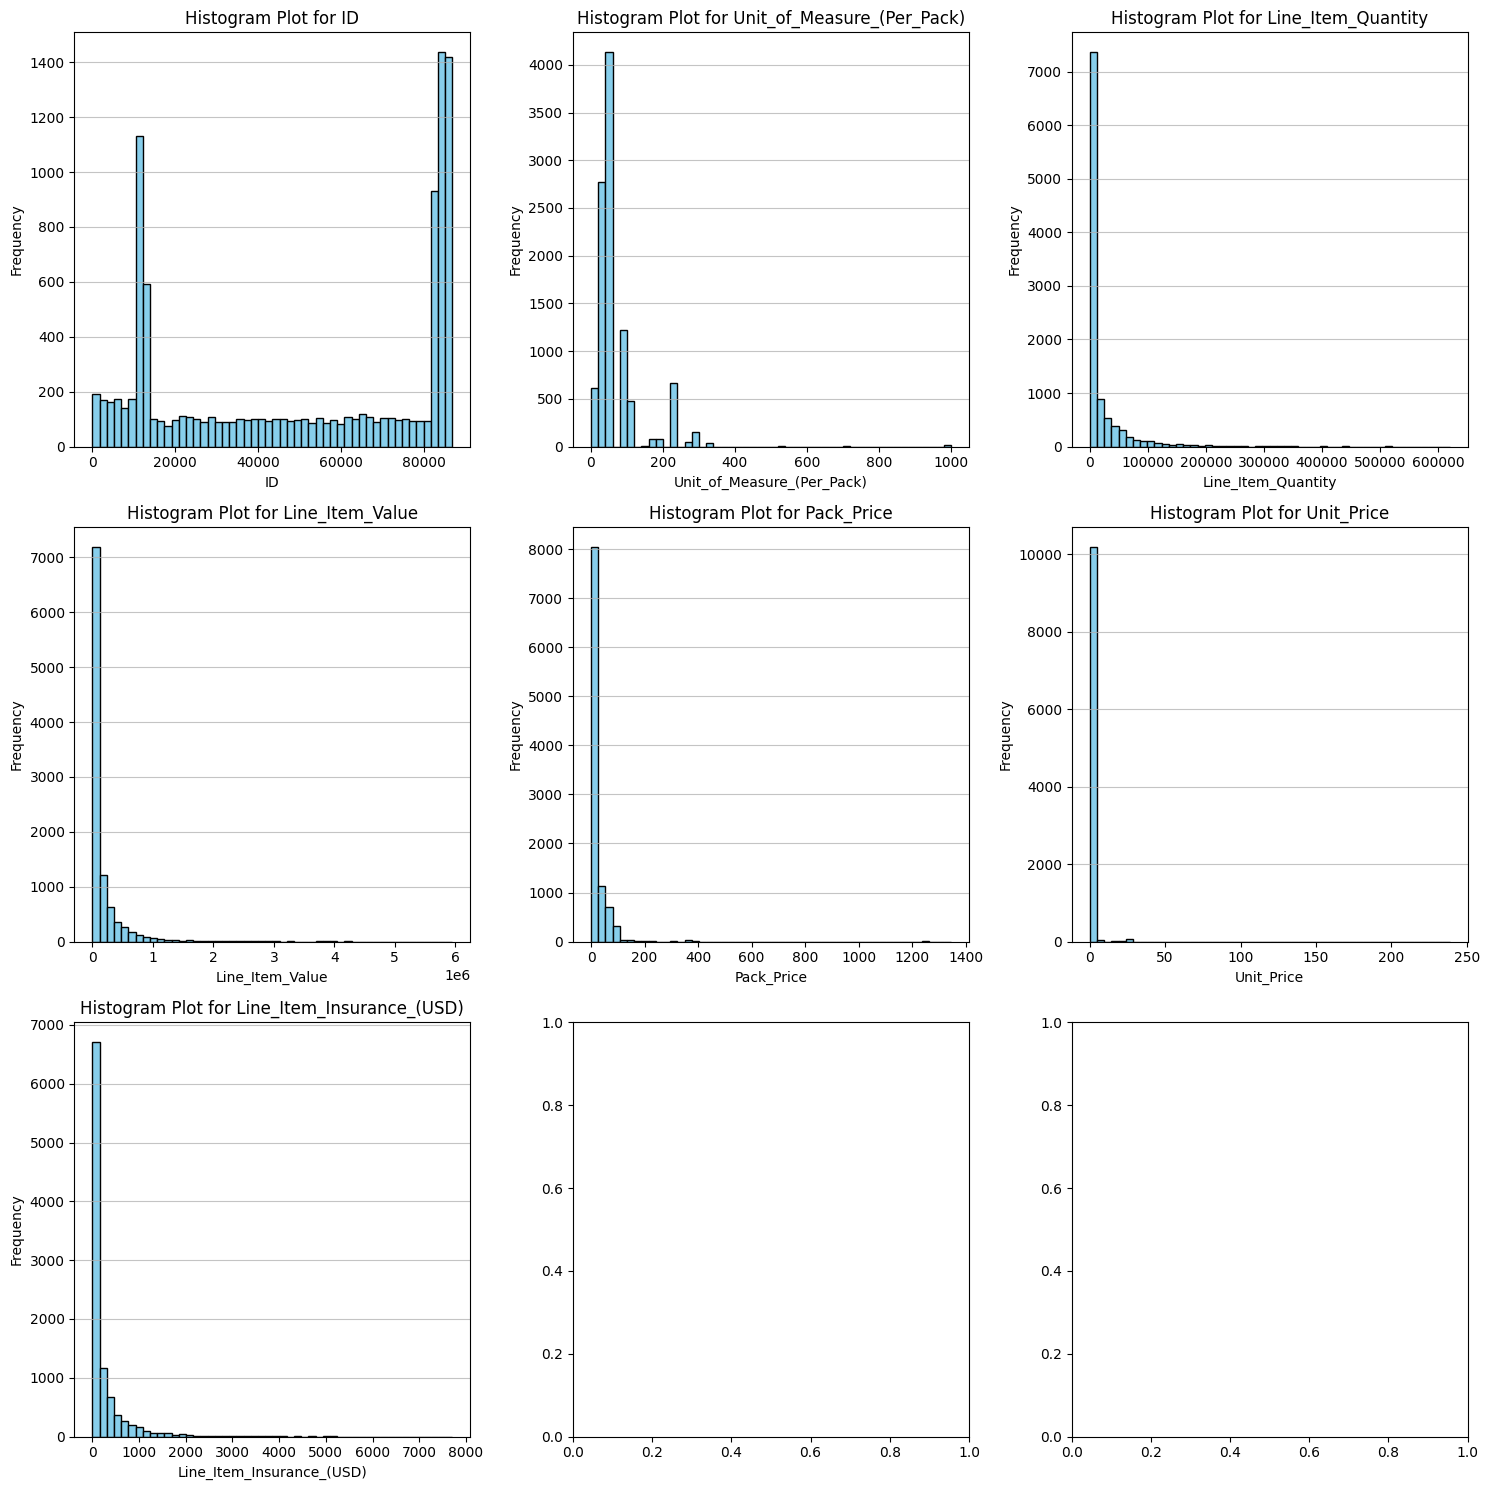

In [195]:
def histoplot_dataframe(df, bins=50, color='skyblue'):
    """
    Generate histogram plots for each column in the DataFrame in a single row.

    Parameters:
    - df: pandas DataFrame
    - bins: int or sequence, optional (default is 10)
    - color: str, optional (default is 'skyblue')

    Returns:
    - None (displays the plots in a single row)
    """
    num_columns = len(df.columns)
    num_plots_per_row = 3  # Number of plots to display in each row
    num_rows = -(-num_columns // num_plots_per_row)  # Ceiling division to calculate the number of rows

    fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5 * num_rows))

    for i, column in enumerate(df.columns):
        row_index = i // num_plots_per_row
        col_index = i % num_plots_per_row

        ax = axes[row_index, col_index] if num_rows > 1 else axes[col_index]
        ax.hist(df[column], bins=bins, color=color, edgecolor='black')
        ax.set_title(f'Histogram Plot for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.grid(axis='y', alpha=0.75)

    plt.tight_layout()
    plt.show()
histoplot_dataframe(df=df[numerical_columns])

The columns exhibit a right skewness, suggesting a potential need for transformation in subsequent analyses. 


The skewness indicates that some project orders may have a substantial volume of orders.

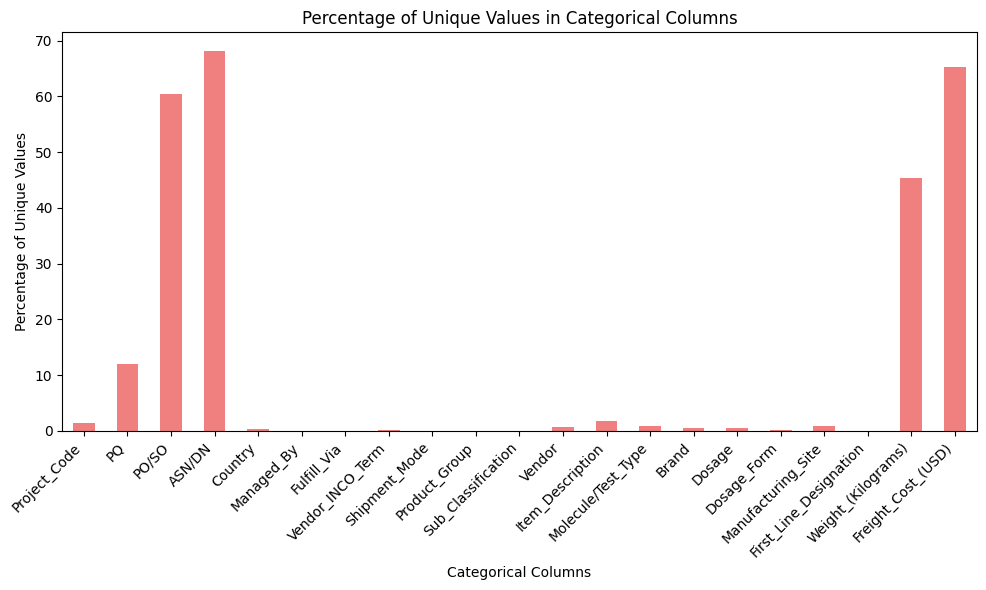

In [196]:
def plot_unique_values_percentage(df, categorical_columns):
    """
    Plot the percentage of unique values in specified categorical columns of the DataFrame.

    Parameters:
    - df: pandas DataFrame
    - categorical_columns: list of categorical column names

    Returns:
    - None (plots the figure)
    """
    unique_percentage = (df[categorical_columns].nunique() / len(df) * 100).round(2)

    plt.figure(figsize=(10, 6))
    unique_percentage.plot(kind='bar', color='lightcoral')
    plt.title('Percentage of Unique Values in Categorical Columns')
    plt.xlabel('Categorical Columns')
    plt.ylabel('Percentage of Unique Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_unique_values_percentage(df, categorical_columns=categorical_columns)


NAN Values

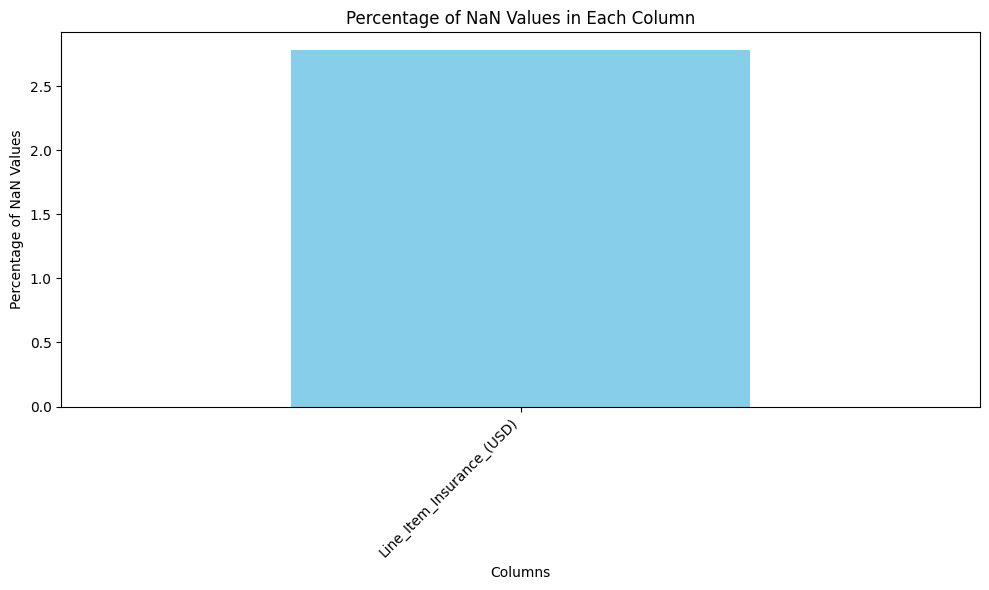

In [197]:
plot_nan_percentage(df[numerical_columns])

##### Line Item Insurance 

Replacing with median
- This function calculates the median value for the specified column using the median method and then uses the fillna method to replace NaN values in that column with the calculated median.

In [198]:
def replace_nan_with_median(df, column_label):
    """
    Replace NaN values in a specific column with the median.

    Parameters:
    - df: pandas DataFrame
    - column_label: str, column label for which NaN values should be replaced

    Returns:
    - df: pandas DataFrame with NaN values replaced by median in the specified column
    """
    median_value = df[column_label].median()
    df[column_label] = df[column_label].fillna(median_value)
    return df

df=replace_nan_with_median(df,column_label="Line_Item_Insurance_(USD)")


##### Freight and Weight Column

In [199]:
import re

In [110]:
def change_to_number(freight_cost_usd):
    regex = {"id_number": ":\d*"}
    match = re.search(regex['id_number'], freight_cost_usd, re.IGNORECASE)
    
    if match:
        id = match.group(0).replace(':', '')
        filtered = df.query("ID == " + id)
        
        if not filtered.empty:
            return filtered['Freight_Cost_(USD)'].iloc[0]
    
    return freight_cost_usd

def convert_to_number(weight):
    regex = {"id_number": ":\d*"}
    match = re.search(regex['id_number'], weight, re.IGNORECASE)
    
    if match:
        id = match.group(0).replace(':', '')
        filtered = df.query("ID == " + id)
        
        if not filtered.empty:
            return filtered['Weight_(Kilograms)'].iloc[0]
    
    return weight

# Apply the functions to clean columns
df['Freight_Cost_USD_Clean'] = df['Freight_Cost_(USD)'].apply(change_to_number)
df['Weight_Kilograms_Clean'] = df['Weight_(Kilograms)'].apply(convert_to_number)

print("Weight and freight completed")

# Identify indexes with specific conditions
freight_cost_indexes = df.index[(df['Freight_Cost_USD_Clean'] == 'Freight Included in Commodity Cost') | (df['Freight_Cost_USD_Clean'] == 'Invoiced Separately')].tolist()
weight_indexes = df.index[df['Weight_Kilograms_Clean'] == 'Weight Captured Separately'].tolist()
shipment_indexes = df.index[df['Shipment_Mode'] == 'no_value'].tolist()

print("Freight_Cost_USD_Clean_indexes:", len(freight_cost_indexes))
print("Weight_Kilograms_Clean_indexes:", len(weight_indexes))
print("Shipment_Mode indexes:         ", len(shipment_indexes))

# Combine indexes and drop rows
indexes = list(set(freight_cost_indexes + weight_indexes + shipment_indexes))
print("Indexes:", len(indexes))
df_clean = df.drop(indexes)

Weight and freight completed
Freight_Cost_USD_Clean_indexes: 1786
Weight_Kilograms_Clean_indexes: 1633
Shipment_Mode indexes:          0
Indexes: 1831


In [111]:
print("-----Before Modification -------")
print("Size:", df.shape)

print("-----After Modification -------")
print("Size:", df_clean.shape)


df_clean["Freight_Cost_USD_Clean"]=df_clean["Freight_Cost_USD_Clean"].astype("float")
df_clean["Weight_Kilograms_Clean"]=df_clean["Weight_Kilograms_Clean"].astype("float")
        

-----Before Modification -------
Size: (10324, 35)
-----After Modification -------
Size: (8493, 35)


In [112]:
df_clean.drop(['Weight_(Kilograms)','Freight_Cost_(USD)'],axis=1,inplace=True)

In [113]:
df=df_clean.copy()

##### What are the Produts about ?

The dataset encompasses a diverse array of pharmaceutical products characterized by a range of dosage forms.

Additionally, projects are classified into specific subcategories such as 'HIV test', 'Pediatric', 'Adult','Malaria'. These classifications offer insights into the targeted therapeutic areas and demographic groups for each project.


What are the Major Classifications of Products?

In [114]:
df["Sub_Classification"]=np.where((df['Sub_Classification'].str.contains("HIV",case=False)),"HIV",df["Sub_Classification"])

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\456581937.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')


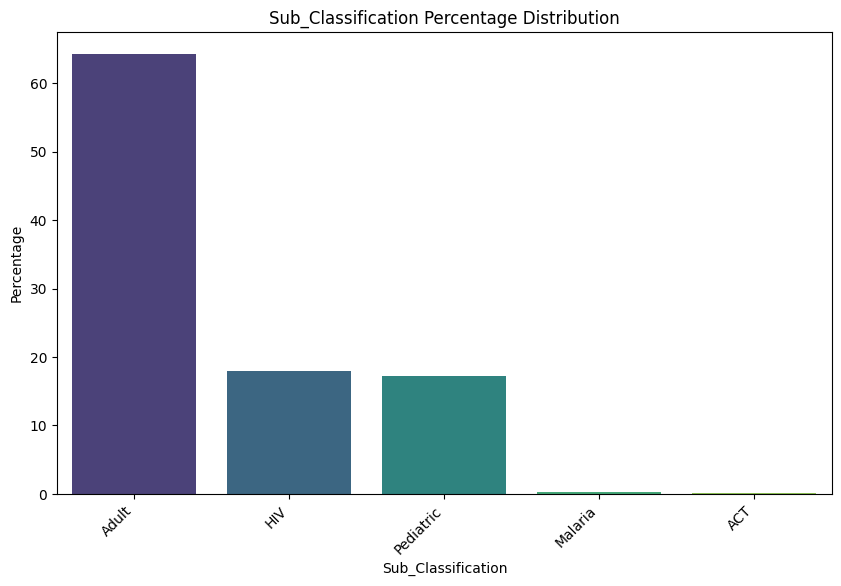

Sub_Classification: Adult, Percentage: 64.26%
Sub_Classification: HIV, Percentage: 17.93%
Sub_Classification: Pediatric, Percentage: 17.28%
Sub_Classification: Malaria, Percentage: 0.33%
Sub_Classification: ACT, Percentage: 0.19%


In [115]:
plot_categorical_distribution(dataframe=df,column_name='Sub_Classification')

**Product Sub-Classification Summary:**
- **Adult:** 63.88%
- **Pediatric:** 18.94%
- **HIV test:** 16.18%
- **Malaria:** 0.29%
- **ACT (Artemisinin-based Combination Therapy):** 0.15%

Dosage form of these Products 

In [116]:
df["Dosage_Form"]=np.where((df['Dosage_Form'].str.contains("Tablet",case=False)),"Tablet",df["Dosage_Form"])
df["Dosage_Form"]=np.where((df['Dosage_Form'].str.contains("Oral",case=False)),"Oral",df["Dosage_Form"])
df["Dosage_Form"]=np.where((df['Dosage_Form'].str.contains("Capsule",case=False)),"Capsule",df["Dosage_Form"])
df["Dosage_Form"]=np.where((df['Dosage_Form'].str.contains("kit",case=False)),"Test kit",df["Dosage_Form"])

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\456581937.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')


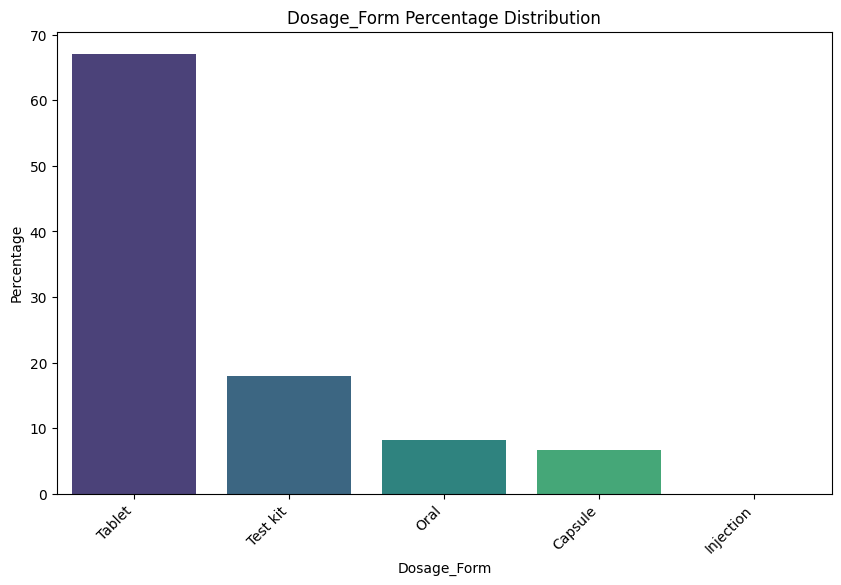

Dosage_Form: Tablet, Percentage: 67.09%
Dosage_Form: Test kit, Percentage: 18.00%
Dosage_Form: Oral, Percentage: 8.18%
Dosage_Form: Capsule, Percentage: 6.69%
Dosage_Form: Injection, Percentage: 0.04%


In [117]:
plot_categorical_distribution(dataframe=df,column_name='Dosage_Form')

**Dosage Form Distribution:**
- **Tablet:** Dominates the dataset at 65.00%, indicating a substantial use of this oral dosage form.
- **Test kit:** Represents 16.82%, highlighting the presence of diagnostic products.
- **Oral:** Constitutes 9.40%, reflecting various oral formulations beyond traditional tablets.
- **Capsule:** Accounts for 8.73%, indicating a notable use of capsule-based pharmaceuticals.
- **Injection:** A minimal percentage of 0.06%, suggesting a limited use of injectable formulations.


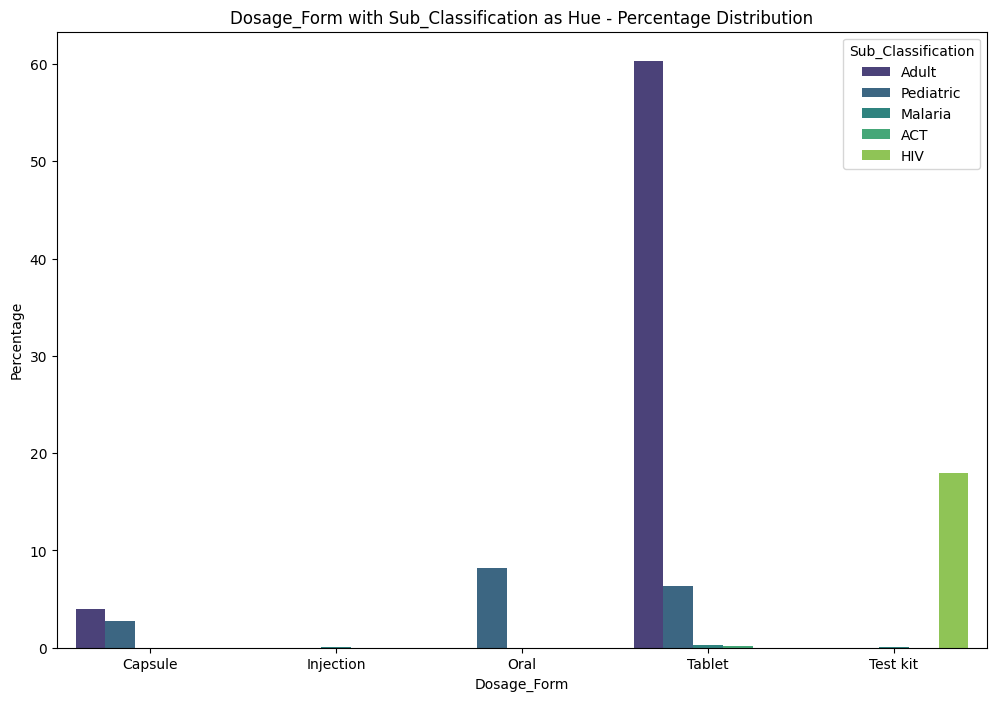

Dosage_Form: Capsule, Sub_Classification: Adult, Percentage: 3.96%
Dosage_Form: Capsule, Sub_Classification: Pediatric, Percentage: 2.73%
Dosage_Form: Injection, Sub_Classification: Malaria, Percentage: 0.02%
Dosage_Form: Injection, Sub_Classification: Pediatric, Percentage: 0.01%
Dosage_Form: Oral, Sub_Classification: Pediatric, Percentage: 8.18%
Dosage_Form: Tablet, Sub_Classification: ACT, Percentage: 0.19%
Dosage_Form: Tablet, Sub_Classification: Adult, Percentage: 60.31%
Dosage_Form: Tablet, Sub_Classification: Malaria, Percentage: 0.24%
Dosage_Form: Tablet, Sub_Classification: Pediatric, Percentage: 6.36%
Dosage_Form: Test kit, Sub_Classification: HIV, Percentage: 17.93%
Dosage_Form: Test kit, Sub_Classification: Malaria, Percentage: 0.07%


In [118]:
plot_categorical_hue(dataframe=df,x_column='Dosage_Form',hue_column='Sub_Classification')



**Insights:**
- **Capsules for All Ages:** Capsule formulations, accounting for 5.20% in the adult category and 3.53% in the pediatric category.

- **Precision in Injectable Solutions:** Injectable formulations, though minimal in overall representation (0.02% for Malaria and 0.04% for Pediatrics), signify a targeted approach to specific medical conditions.

- **Pediatric Emphasis in Oral Formulations:** Oral formulations tailored for pediatric patients (9.40%).

- **Dominance of Tablets in Adult Healthcare:** Tablets emerge as a cornerstone in adult healthcare, commanding a significant percentage (58.68%). This prevalence underscores their popularity and effectiveness in treating a broad spectrum of adult-specific health concerns.

- **Strategic Integration of Diagnostic Test Kits:** Diagnostic test kits, especially designed for HIV (16.74%) and Malaria (0.08%).




##### Where are these Products Manufactured 

In [119]:
def company(text):
    return text.split(',')[0]

def companycountry(text):
    n=len(text.split(','))
    if n>1:
        return text.split(',')[1]
    else:
        return np.nan


df['Manufacturing_company']=df['Manufacturing_Site'].apply(company)
df["Manufacturing_Location"] = df["Manufacturing_Site"].str.split().str[-1]



In [120]:
df.replace({'Manufacturing_Location': {'Nashik': 'India', 'IN': 'India', 'India.': 'India', 'Ltd.': 'India', 'INDIA': 'India'}}, inplace=True)

In [121]:

replace_low_frequency_categories(dataframe=df, column_name="Manufacturing_Location")

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\456581937.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')


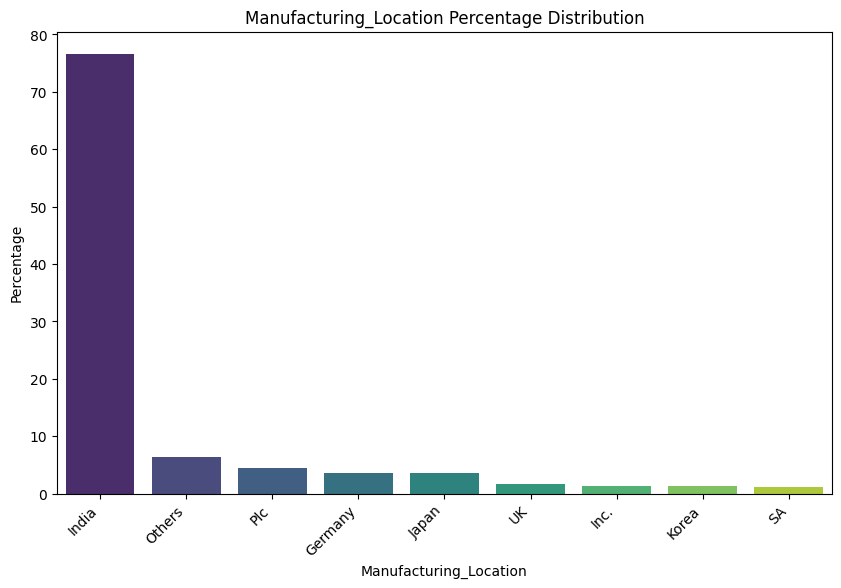

Manufacturing_Location: India, Percentage: 76.65%
Manufacturing_Location: Others, Percentage: 6.30%
Manufacturing_Location: Plc, Percentage: 4.49%
Manufacturing_Location: Germany, Percentage: 3.60%
Manufacturing_Location: Japan, Percentage: 3.51%
Manufacturing_Location: UK, Percentage: 1.61%
Manufacturing_Location: Inc., Percentage: 1.37%
Manufacturing_Location: Korea, Percentage: 1.26%
Manufacturing_Location: SA, Percentage: 1.21%


In [122]:
plot_categorical_distribution(dataframe=df,column_name='Manufacturing_Location')

In [123]:
df=df.drop(columns=['Manufacturing_Site'])

In [124]:
import geopandas as gpd

In [125]:

def plot_country_frequency_on_map(dataframe, country_column):
    """
    Plot countries on a world map with color-coding based on frequency count.

    Parameters:
    - dataframe: pandas DataFrame with country labels
    - country_column: str, the name of the column containing country labels

    Returns:
    - None (displays the plot)
    """
    # Count the frequency of each country
    country_counts = dataframe[country_column].value_counts().reset_index()
    country_counts.columns = ['name', 'frequency']

    # Calculate the percentage of each country
    country_counts['percentage'] = (country_counts['frequency'] / country_counts['frequency'].sum()) * 100

    # Load the world map shapefile
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge the world map with the DataFrame on the specified column
    merged_data = world.merge(country_counts, how='left', on='name')

    # Plot the world map with country color-coding based on frequency count
    fig, ax = plt.subplots(figsize=(15, 10))
    merged_data.boundary.plot(ax=ax, linewidth=0.8)
    merged_data.plot(column='frequency', ax=ax, legend=True,
                    legend_kwds={'label': 'Frequency Scale', 'orientation': 'horizontal'})
    plt.title(f'Country Color Coding on World Map based on Frequency')

    # Print the percentage of each country
    for index, row in country_counts.iterrows():
        print(f"{row['name']}: {row['percentage']:.2f}%")

    plt.show()


C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\309548068.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


India: 76.65%
Others: 6.30%
Plc: 4.49%
Germany: 3.60%
Japan: 3.51%
UK: 1.61%
Inc.: 1.37%
Korea: 1.26%
SA: 1.21%


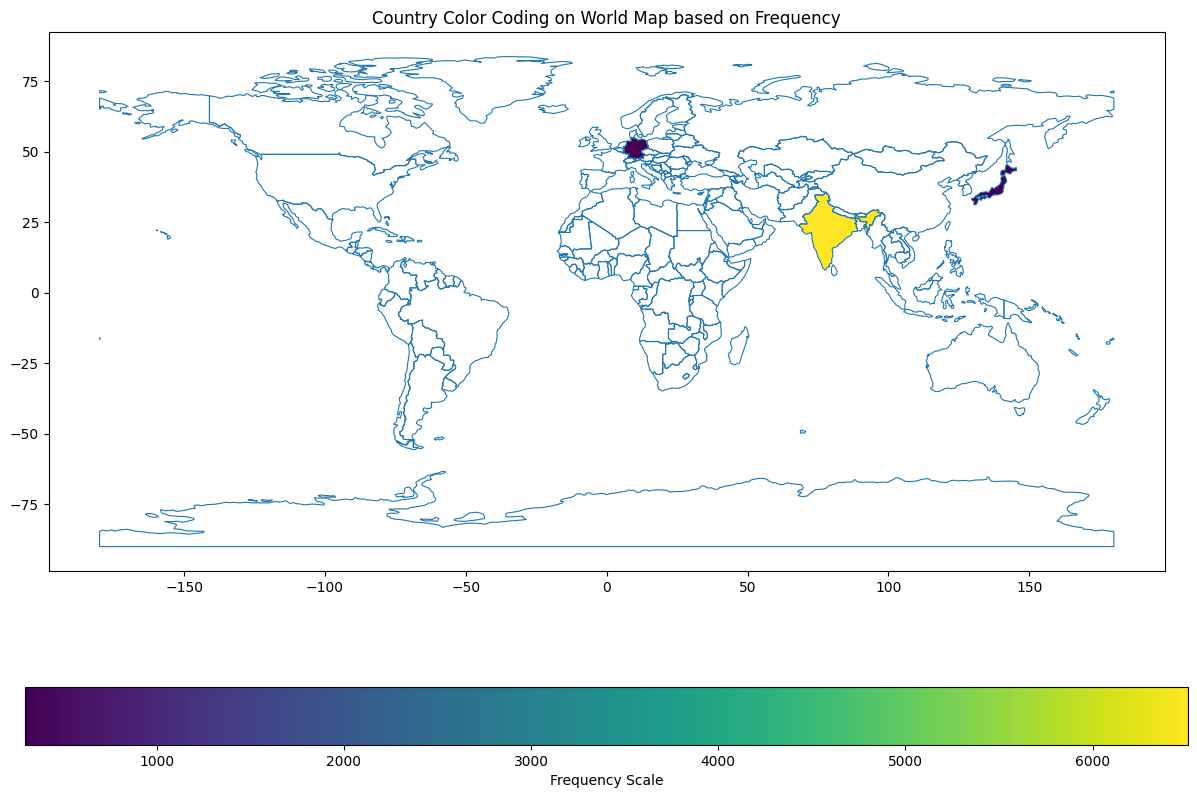

In [126]:
plot_country_frequency_on_map(dataframe=df,country_column='Manufacturing_Location')

**Manufacturing Location Overview:**

The manufacturing locations of the pharmaceutical products in this dataset reveal a diverse global distribution. The primary manufacturing hub is in **India**, contributing significantly at 73.84%, showcasing a substantial presence in pharmaceutical production.

**Other Manufacturing Locations:**
- **Others (6.38%):** Comprising various locations beyond the specified categories.
- **Plc (3.92%):** Reflecting public limited companies involved in manufacturing.
- **Germany (3.63%), Japan (3.34%), UK (2.14%):** European nations contributing to the global manufacturing landscape.
- **France (1.68%), SA (1.58%):** Representing manufacturing facilities in France and South Africa, respectively.
- **Inc. (1.21%):** Denoting incorporated entities involved in manufacturing.
- **NL (1.17%):** Indicating manufacturing operations in the Netherlands.
- **Korea (1.10%):** Highlighting manufacturing presence in South Korea.

##### What Brands are producing these products?

In [127]:
replace_low_frequency_categories(dataframe=df,column_name='Brand',threshold_percentage=3)

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\456581937.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')


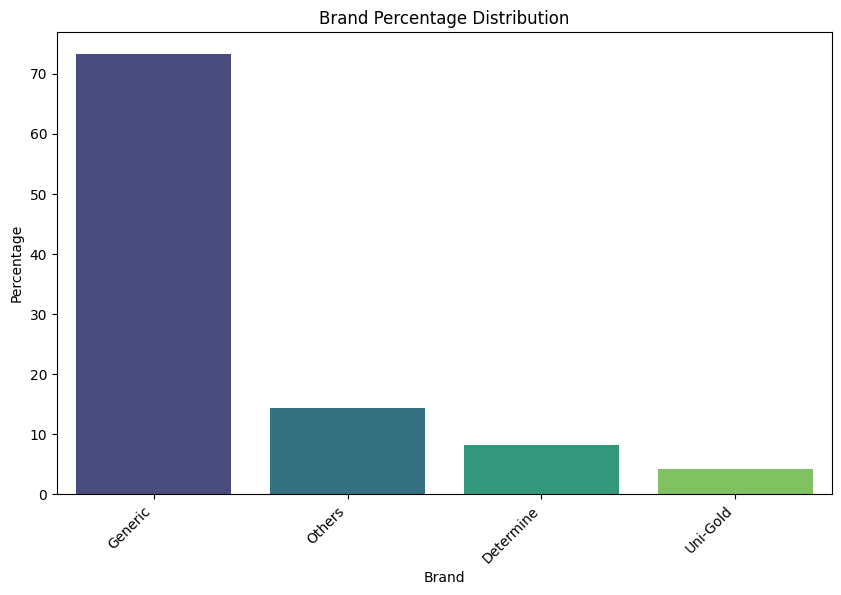

Brand: Generic, Percentage: 73.26%
Brand: Others, Percentage: 14.38%
Brand: Determine, Percentage: 8.17%
Brand: Uni-Gold, Percentage: 4.19%


In [128]:
plot_categorical_distribution(dataframe=df,column_name='Brand')

**Product Categories by Brand:**

- **Generic (70.56%):** The predominant category, comprising a substantial majority at 70.56%. 

- **Others (18.08%):** Encompassing a varied array of brands beyond explicitly specified categories, contributing to 18.08% of the dataset.

- **Determine (7.74%):** A distinct brand category with a notable presence, contributing 7.74% to the dataset.

- **Uni-Gold (3.61%):** Another recognized brand category with a discernible market share, accounting for 3.61%. 


##### What is the time frame to which this data pertains?

##### What Countires we have Data From

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\309548068.py:20: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Côte d'Ivoire: 12.33%
Nigeria: 12.01%
Uganda: 8.85%
Zambia: 7.65%
Vietnam: 7.57%
Haiti: 7.02%
Mozambique: 6.70%
Zimbabwe: 6.10%
Tanzania: 5.78%
Rwanda: 4.67%
Congo, DRC: 3.44%
South Africa: 3.39%
Guyana: 2.67%
Ethiopia: 2.40%
South Sudan: 1.53%
Kenya: 1.10%
Burundi: 1.08%
Namibia: 1.06%
Cameroon: 0.78%
Botswana: 0.75%
Ghana: 0.57%
Dominican Republic: 0.53%
Sudan: 0.49%
Swaziland: 0.39%
Mali: 0.16%
Malawi: 0.16%
Pakistan: 0.15%
Benin: 0.14%
Guatemala: 0.12%
Libya: 0.09%
Angola: 0.08%
Liberia: 0.07%
Afghanistan: 0.04%
Sierra Leone: 0.02%
Lesotho: 0.02%
Togo: 0.02%
Senegal: 0.02%
Guinea: 0.01%


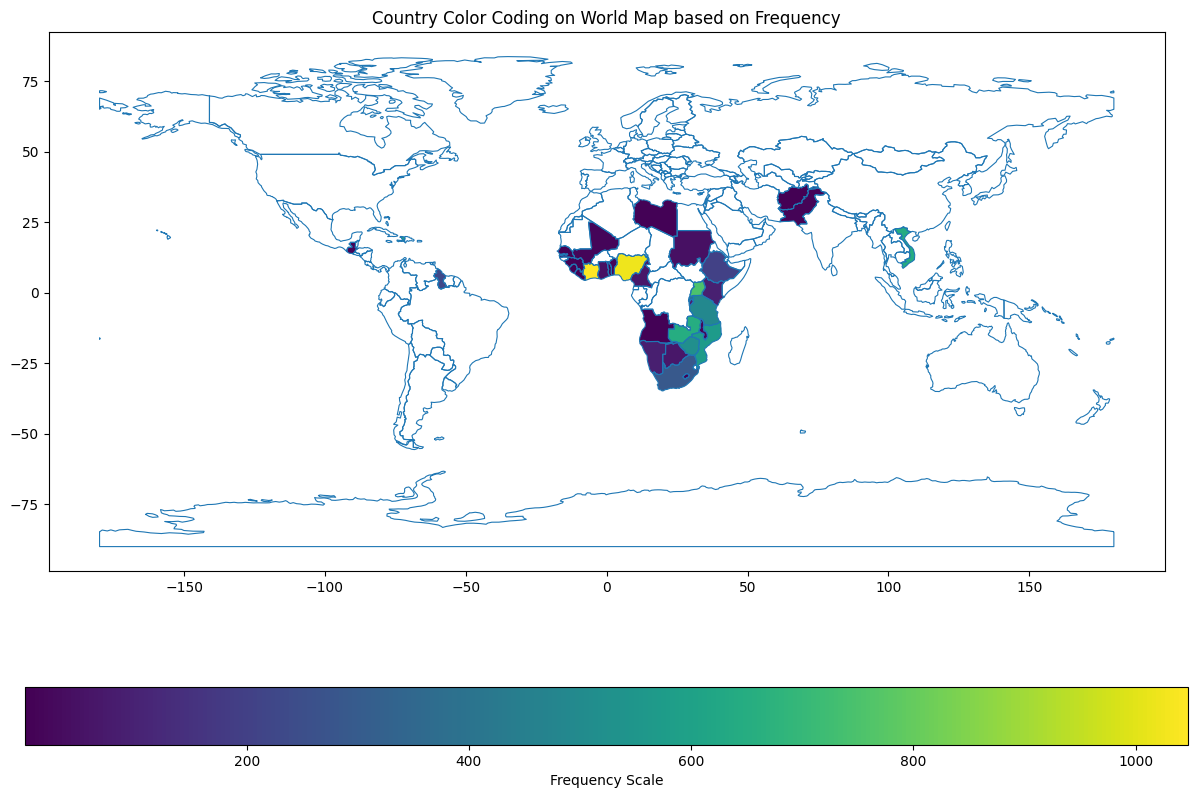

In [129]:
plot_country_frequency_on_map(dataframe=df,country_column='Country')

**Shipment Focus:**
Predominantly directed towards African nations, shipments exhibit a notable exception with Vietnam securing a position in the top 5 destinations. The list includes:
1. **Cote de Ivoire**
2. **Uganda**
3. **Vietnam** (Non-African)
4. **Nigeria**
5. **Haiti**

This succinct overview underscores the diverse distribution of shipments, with Vietnam as a noteworthy non-African recipient.


Replacing Countries with very few counts with others

In [130]:
def replace_low_frequency_categories(dataframe, column_name, threshold_percentage=1, replace_value='Others'):
    """
    Replace categories with less than a specified percentage occurrence in a column with a specified replacement value.

    Parameters:
    - dataframe: pandas DataFrame
    - column_name: str, the name of the column with categorical data
    - threshold_percentage: float, the threshold percentage for category occurrence (default is 5)
    - replace_value: str, the replacement value for low-frequency categories (default is 'Others')

    Returns:
    - None (modifies the DataFrame in place)
    """
    # Calculate the percentage of each category
    category_percentages = dataframe[column_name].value_counts(normalize=True) * 100

    # Identify categories with less than the threshold percentage
    low_frequency_categories = category_percentages[category_percentages < threshold_percentage].index.tolist()

    # Replace low-frequency categories with the specified replacement value
    dataframe[column_name] = np.where(dataframe[column_name].isin(low_frequency_categories), replace_value, dataframe[column_name])

In [131]:
replace_low_frequency_categories(dataframe=df, column_name="Country",threshold_percentage=5)

##### Who is Managing the Shipments

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\456581937.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')


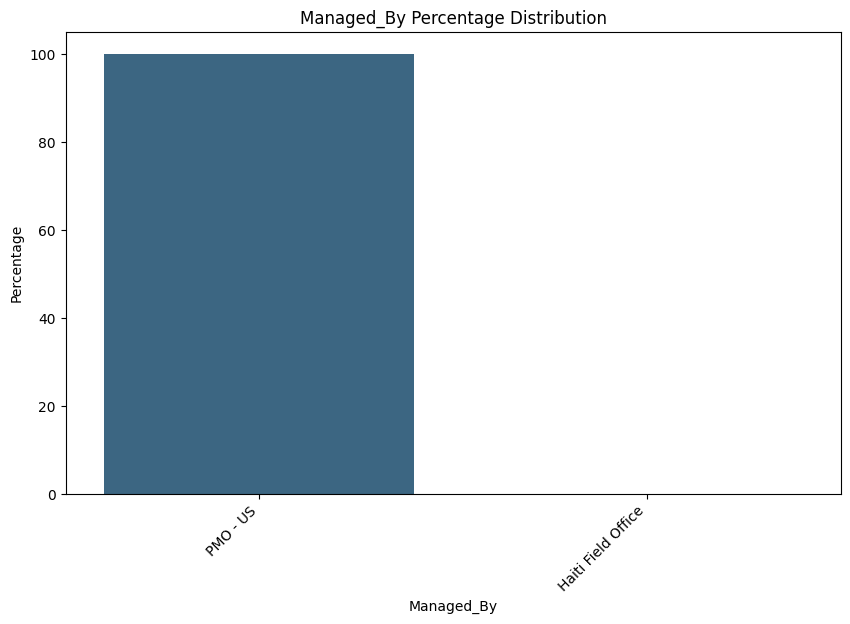

Managed_By: PMO - US, Percentage: 99.99%
Managed_By: Haiti Field Office, Percentage: 0.01%


In [132]:
plot_categorical_distribution(dataframe=df,column_name='Managed_By')

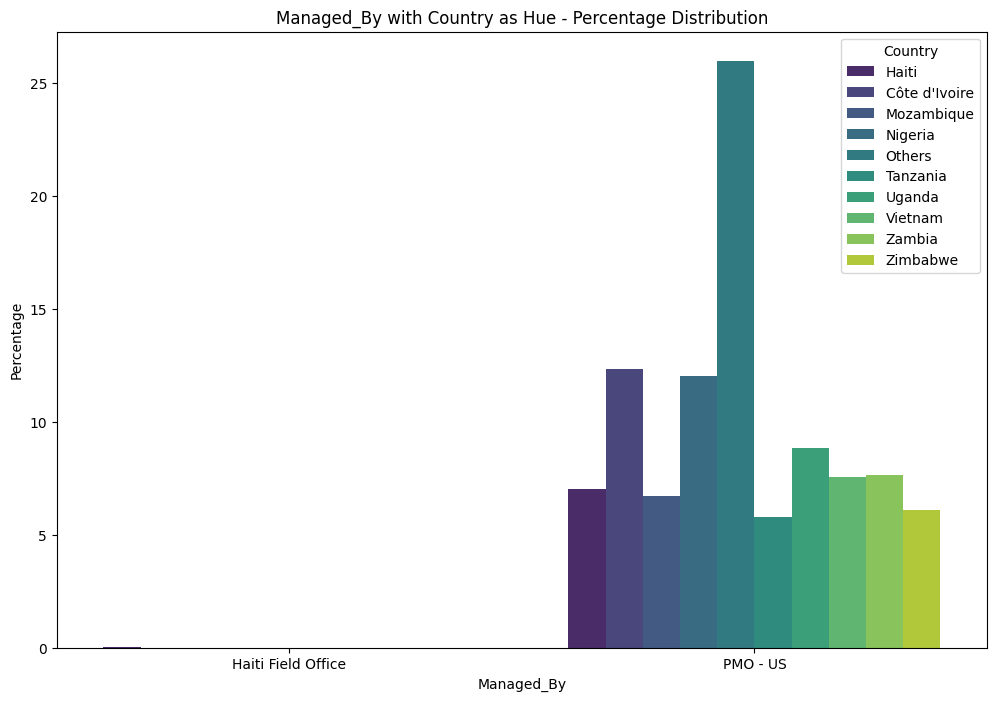

Managed_By: Haiti Field Office, Country: Haiti, Percentage: 0.01%
Managed_By: PMO - US, Country: Côte d'Ivoire, Percentage: 12.33%
Managed_By: PMO - US, Country: Haiti, Percentage: 7.01%
Managed_By: PMO - US, Country: Mozambique, Percentage: 6.70%
Managed_By: PMO - US, Country: Nigeria, Percentage: 12.01%
Managed_By: PMO - US, Country: Others, Percentage: 25.99%
Managed_By: PMO - US, Country: Tanzania, Percentage: 5.78%
Managed_By: PMO - US, Country: Uganda, Percentage: 8.85%
Managed_By: PMO - US, Country: Vietnam, Percentage: 7.57%
Managed_By: PMO - US, Country: Zambia, Percentage: 7.65%
Managed_By: PMO - US, Country: Zimbabwe, Percentage: 6.10%


In [133]:
plot_categorical_hue(dataframe=df,x_column='Managed_By',hue_column='Country')

**Shipment Management:**
The overwhelming majority of these shipments, over 99%, are under the purview of PMO-US. The remaining delivery responsibilities are divided among various field offices, including:

- **South Africa Field Office**
- **Haiti Field Office**
- **Ethiopia Field Office**

This distribution highlights the significant role of PMO-US in managing the majority of shipments, while also acknowledging the involvement of other field offices in specific delivery contexts.


##### Mode of Shipments

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\456581937.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')


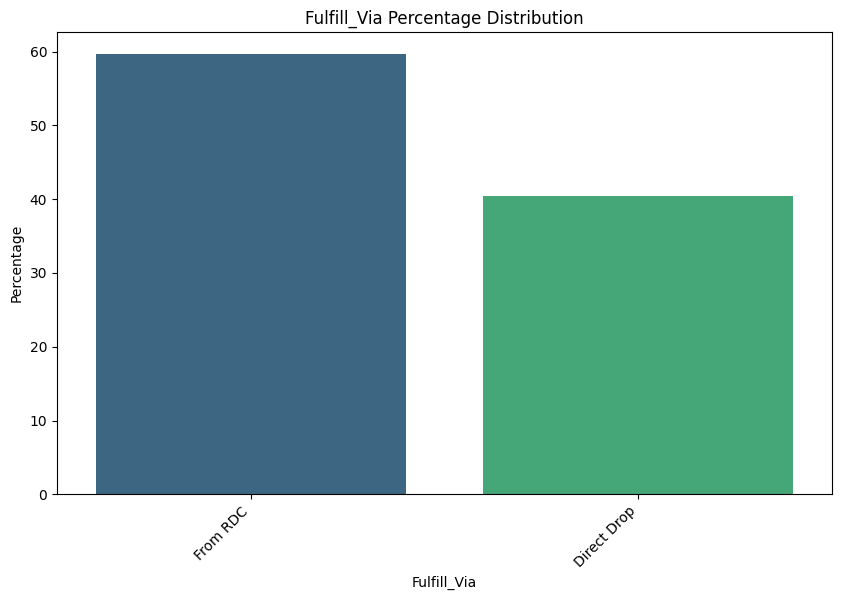

Fulfill_Via: From RDC, Percentage: 59.64%
Fulfill_Via: Direct Drop, Percentage: 40.36%


In [134]:
plot_categorical_distribution(dataframe=df,column_name='Fulfill_Via')

**Shipment Fulfillment Methods:**
These shipments are fulfilled using two methods:

- **RDC (Regional Distribution Center)**
- **Direct Drop**

The distribution of fulfillment methods is as follows:

- **RDC:** 53%
- **Direct Drop:** 45%

This dual approach provides flexibility and efficiency in managing the diverse shipment needs.

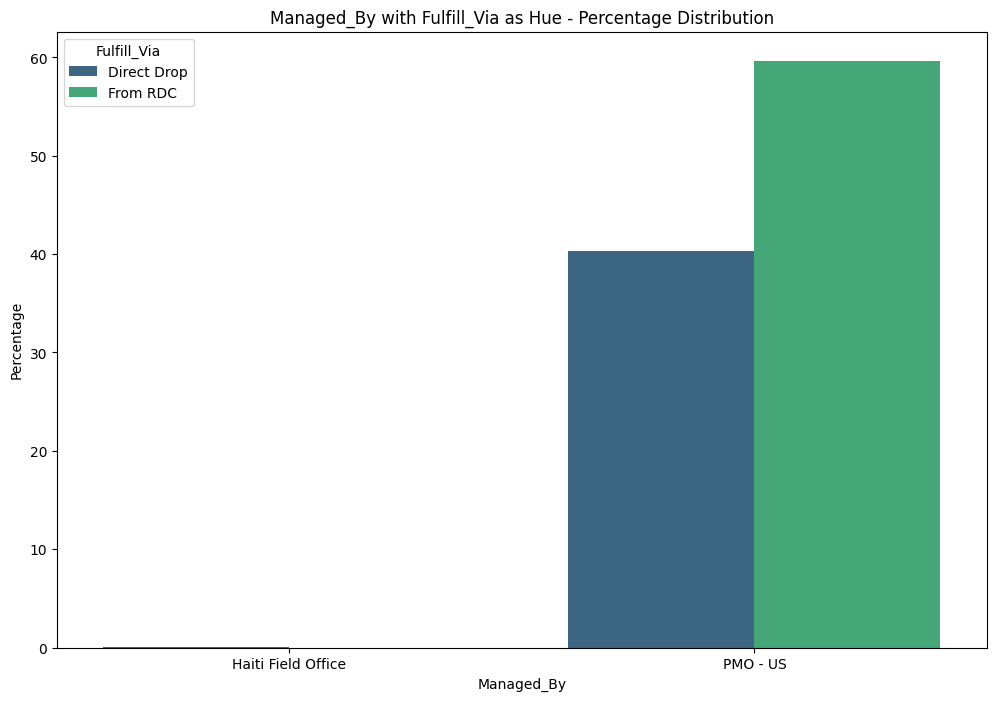

Managed_By: Haiti Field Office, Fulfill_Via: Direct Drop, Percentage: 0.01%
Managed_By: PMO - US, Fulfill_Via: Direct Drop, Percentage: 40.35%
Managed_By: PMO - US, Fulfill_Via: From RDC, Percentage: 59.64%


In [135]:
plot_categorical_hue(dataframe=df,x_column='Managed_By',hue_column='Fulfill_Via')

Shipments managed by PMO are Done with both Direct Drop and RDC both almost 50 %

##### What are the Shipment Modes for Deilvery 

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\456581937.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')


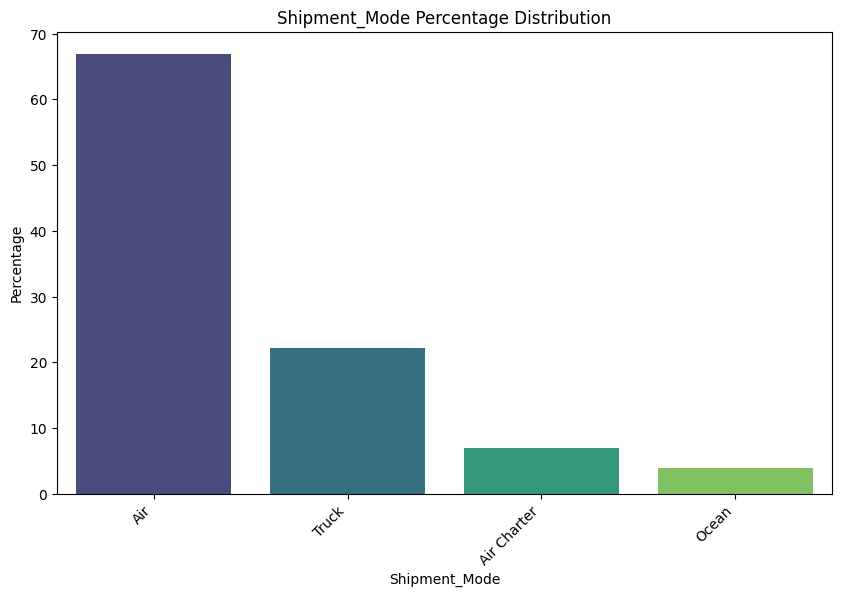

Shipment_Mode: Air, Percentage: 66.94%
Shipment_Mode: Truck, Percentage: 22.13%
Shipment_Mode: Air Charter, Percentage: 6.99%
Shipment_Mode: Ocean, Percentage: 3.94%


In [136]:
plot_categorical_distribution(dataframe=df,column_name='Shipment_Mode')

**Shipment Modes Overview:**
- **Air:** 61.35%
- **Truck:** 28.40%
- **Air Charter:** 6.52%
- **Ocean:** 3.72%


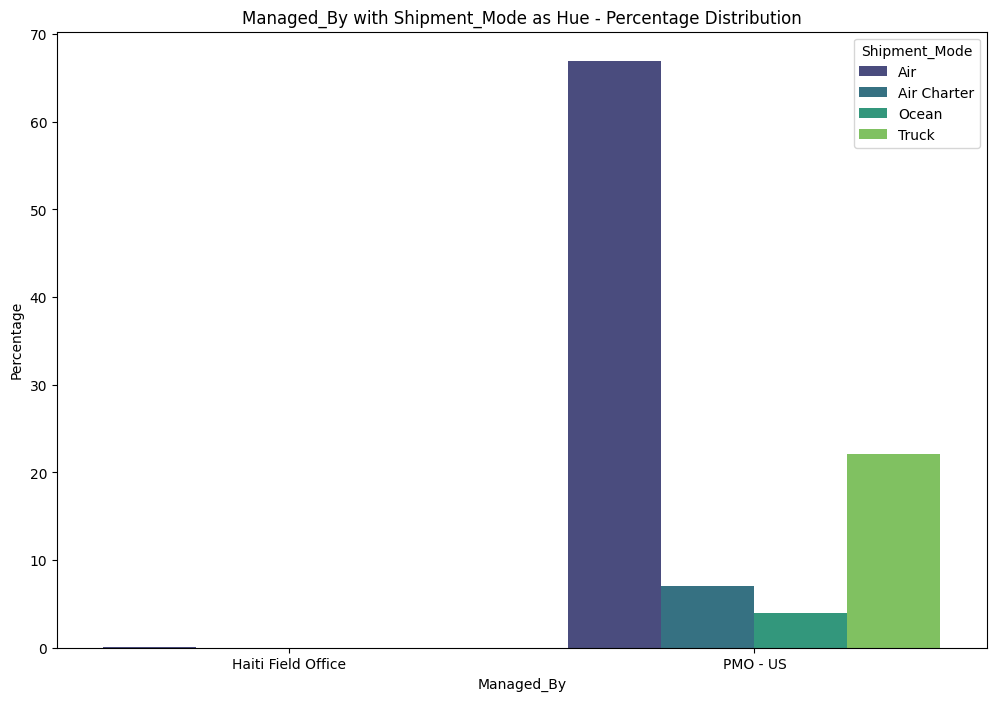

Managed_By: Haiti Field Office, Shipment_Mode: Air, Percentage: 0.01%
Managed_By: PMO - US, Shipment_Mode: Air, Percentage: 66.93%
Managed_By: PMO - US, Shipment_Mode: Air Charter, Percentage: 6.99%
Managed_By: PMO - US, Shipment_Mode: Ocean, Percentage: 3.94%
Managed_By: PMO - US, Shipment_Mode: Truck, Percentage: 22.13%


In [137]:
plot_categorical_hue(dataframe=df,
                     x_column='Managed_By',
                     hue_column='Shipment_Mode')

**Shipment Mode Breakdown by Management:**
- **Ethiopia Field Office:** Utilizes truck transportation for shipments, constituting 0.01%.
- **Haiti Field Office:** Prefers air transportation, representing 0.01% of shipments.
- **PMO - US:** Manages a diverse set of shipment modes, with air leading at 61.34%, followed by air charter (6.52%), ocean (3.72%), and truck (27.82%).
- **South Africa Field Office:** Primarily relies on truck transportation, accounting for 0.57% of shipments.


##### Who are the Vendors?

In [138]:
df['Vendor'].nunique()

52

In [139]:
replace_low_frequency_categories(dataframe=df,column_name='Vendor',threshold_percentage=2)

C:\Users\Hitesh\AppData\Local\Temp\ipykernel_8016\456581937.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=column_percentage.index, y=column_percentage.values, palette='viridis')


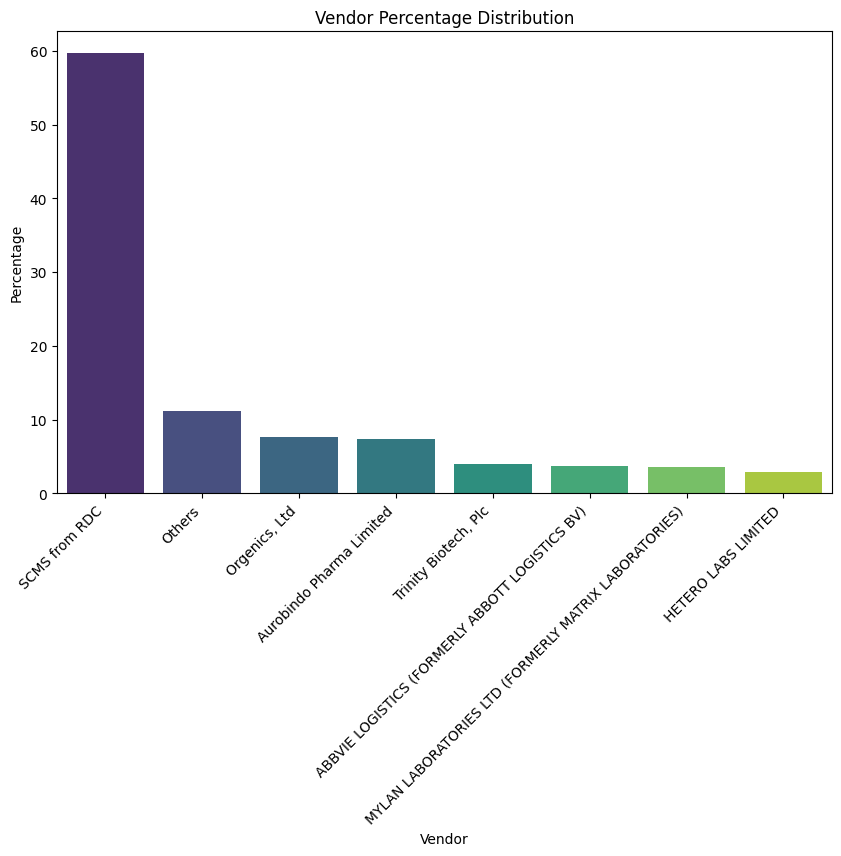

Vendor: SCMS from RDC, Percentage: 59.64%
Vendor: Others, Percentage: 11.13%
Vendor: Orgenics, Ltd, Percentage: 7.64%
Vendor: Aurobindo Pharma Limited, Percentage: 7.38%
Vendor: Trinity Biotech, Plc, Percentage: 3.99%
Vendor: ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV), Percentage: 3.73%
Vendor: MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORATORIES), Percentage: 3.58%
Vendor: HETERO LABS LIMITED, Percentage: 2.91%


In [140]:
plot_categorical_distribution(dataframe=df,column_name='Vendor')

Majority of the Supplies are distirbuted by SCMS RDC (52%)

#### Where are these Vendors procuring Materials from 

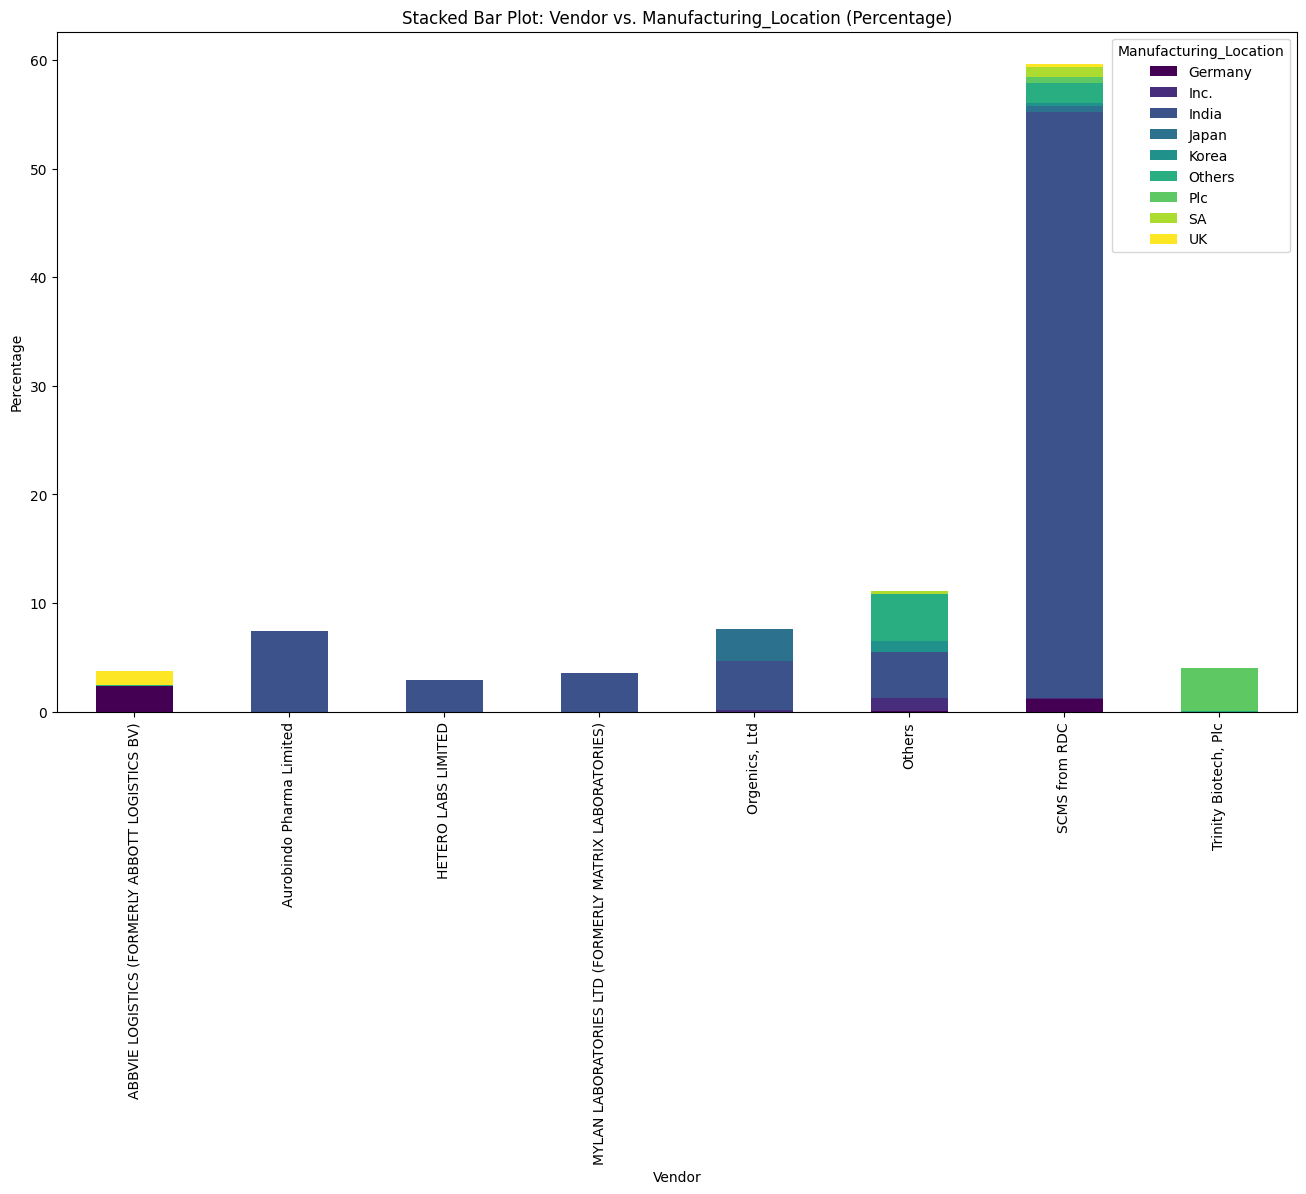

In [141]:
plot_stacked_bar_plot(data=df,category1='Vendor',category2='Manufacturing_Location')

**PLC - Public Limited Company**

A Public Limited Company, commonly abbreviated as PLC or plc, is a type of public company governed by United Kingdom company law, applicable in some Commonwealth jurisdictions, and the Republic of Ireland.

*Key Information:*
- **Material Procurement:** The majority of materials are sourced from India.

*Vendor Highlight:*
- **Trinity Biotech plc:** Notably, Trinity Biotech is a Public Limited Company (PLC) vendor, indicating that it engages in the procurement of materials from other PLCs.



#### Shipments Modes to Vendors

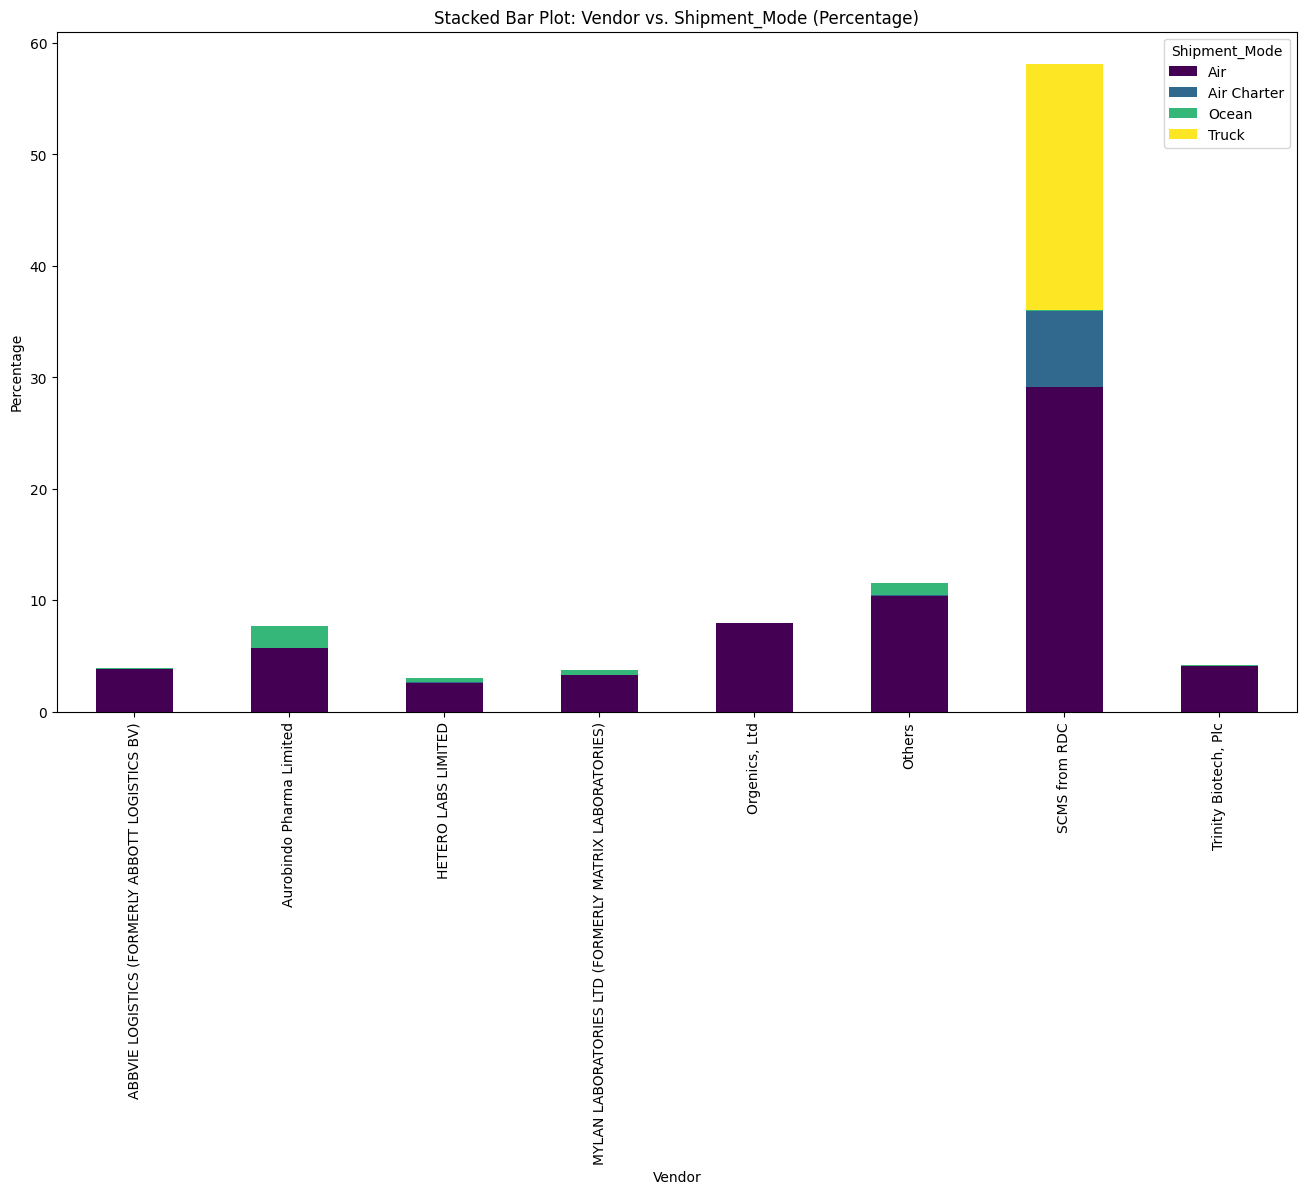

In [142]:
plot_stacked_bar_plot(data=df,category1='Vendor',category2='Shipment_Mode')

**Shipment Modes for RDC:**
- **Air:** 25.5%
- **Truck:** 19.2%
- **Air Charter:** 6.3%

*Observations:*
- S. Buys Wholesaler predominantly utilizes the Truck shipment mode.
- Aurobindo generally procures through ocean shipement mode than other vendors.
- Overall, the preferred mode of shipment for most vendors is Air.



Dropping Irrelevant columns

In [143]:
df=df.drop(columns=['Item_Description', 'Molecule/Test_Type'])

In [144]:
df.columns

Index(['ID', 'Project_Code', 'PQ', 'PO/SO', 'ASN/DN', 'Country', 'Managed_By',
       'Fulfill_Via', 'Vendor_INCO_Term', 'Shipment_Mode',
       'PQ_First_Sent_to_Client_Date', 'PO_Sent_to_Vendor_Date',
       'Scheduled_Delivery_Date', 'Delivered_to_Client_Date',
       'Delivery_Recorded_Date', 'Product_Group', 'Sub_Classification',
       'Vendor', 'Brand', 'Dosage', 'Dosage_Form',
       'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'Unit_Price', 'First_Line_Designation',
       'Line_Item_Insurance_(USD)', 'Freight_Cost_USD_Clean',
       'Weight_Kilograms_Clean', 'Manufacturing_company',
       'Manufacturing_Location'],
      dtype='object')

In [145]:
df=df.drop(columns=['ID', 'Project_Code', 'PQ', 'PO/SO', 'ASN/DN'])

In [146]:
numerical_columns,categorical_columns=separate_numerical_categorical_columns(df=df)

##### Outlier

In [147]:
class OutlierBoxPlotter:
    def __init__(self, df, numerical_columns):
        self.df = df
        self.numerical_columns = numerical_columns
        self.outliers = None
        self.filtered_df = None

    def plot_box_plot(self, title):
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.df[self.numerical_columns])
        plt.title(title)
        plt.show()

    def identify_outliers(self, quantile_percentage=0.25, threshold=1.5):
        self.outliers = pd.DataFrame()

        for column in self.numerical_columns:
            q1 = np.percentile(self.df[column], 100 * quantile_percentage / 2)
            q3 = np.percentile(self.df[column], 100 - (100 * quantile_percentage / 2))
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = (self.df[column] < lower_bound) | (self.df[column] > upper_bound)
            self.outliers[column] = column_outliers

            # Print only count of outliers removed for each column
            outliers_removed = self.df[column][column_outliers]
            outliers_removed_count = outliers_removed.count()
            print(f"Count of outliers removed from '{column}': {outliers_removed_count}\n")

    def remove_outliers(self):
        if self.outliers is not None:
            self.filtered_df = self.df[~self.outliers.any(axis=1)]
            # Print shape before and after outlier removal
            print(f"Shape before outlier removal: {self.df.shape}")
            print(f"Shape after outlier removal: {self.filtered_df.shape}")
        else:
            print("Outliers not identified. Please run identify_outliers() first.")

    def plot_before_after(self, title_before, title_after):
        plt.figure(figsize=(15, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(data=self.df[self.numerical_columns])
        plt.xticks(rotation=90)
        plt.title(title_before)

        plt.subplot(1, 2, 2)
        sns.boxplot(data=self.filtered_df[self.numerical_columns])
        plt.title(title_after)
        
        # Orient x-axis labels at a 90-degree angle
        plt.xticks(rotation=90)

        plt.show()

    def get_filtered_dataframe(self):
        if self.filtered_df is not None:
            return self.filtered_df
        else:
            print("Filtered DataFrame is not available. Please run remove_outliers() first.")
            return None

Count of outliers removed from 'Unit_of_Measure_(Per_Pack)': 195

Count of outliers removed from 'Line_Item_Quantity': 265

Count of outliers removed from 'Line_Item_Value': 254

Count of outliers removed from 'Pack_Price': 126

Count of outliers removed from 'Unit_Price': 188

Count of outliers removed from 'Line_Item_Insurance_(USD)': 262

Count of outliers removed from 'Freight_Cost_USD_Clean': 229

Count of outliers removed from 'Weight_Kilograms_Clean': 285

Shape before outlier removal: (8493, 27)
Shape after outlier removal: (7373, 27)


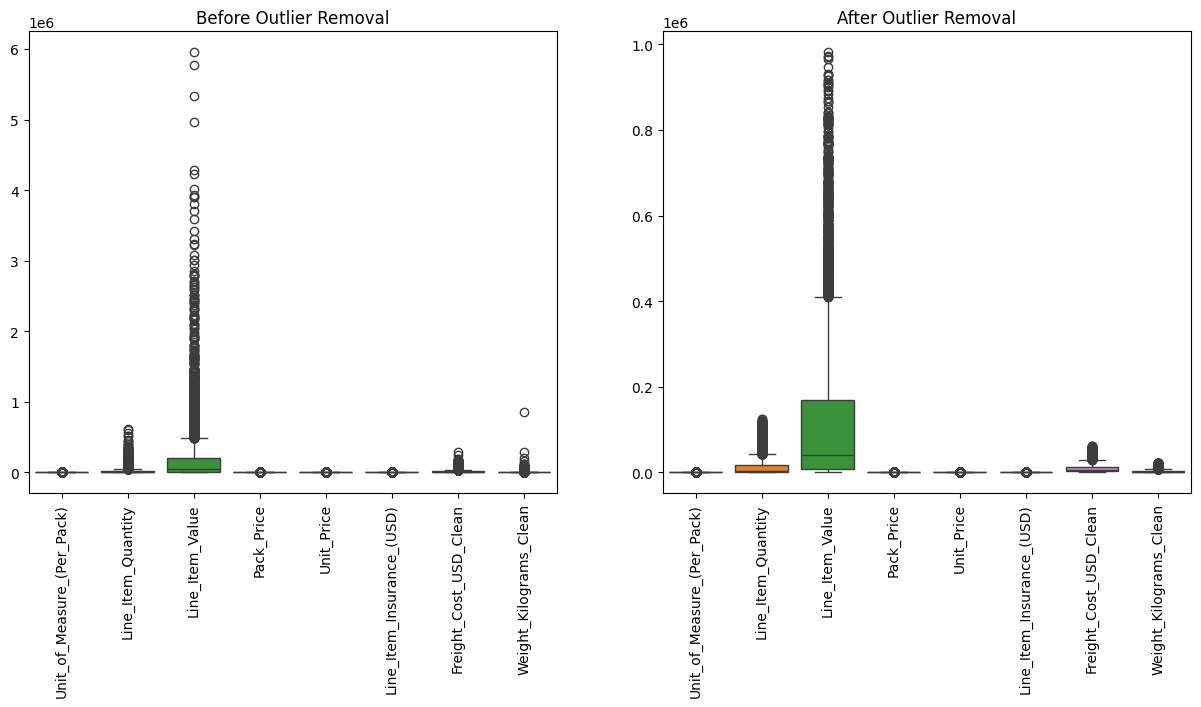

In [148]:
outlier_box_plotter = OutlierBoxPlotter(df,numerical_columns=numerical_columns)

# Identify outliers using default threshold (1.5)
outlier_box_plotter.identify_outliers()

# Remove outliers
outlier_box_plotter.remove_outliers()

# Plot both box plots side by side for comparison
outlier_box_plotter.plot_before_after("Before Outlier Removal", "After Outlier Removal")

#### Price analysis of the Projects/Products

In [149]:
numerical_columns

['Unit_of_Measure_(Per_Pack)',
 'Line_Item_Quantity',
 'Line_Item_Value',
 'Pack_Price',
 'Unit_Price',
 'Line_Item_Insurance_(USD)',
 'Freight_Cost_USD_Clean',
 'Weight_Kilograms_Clean']

In [150]:
def hist_box_plot(data, numerical_column, bin_count=20):
    """
    Generate a histogram and a box plot side by side for a numerical column in a DataFrame.

    Parameters:
    - data: pandas DataFrame
    - numerical_column: Label of the numerical column for which to create the plots
    - bin_count: Number of bins for the histogram (default is 20)

    Returns:
    - None (displays the plots)
    """
    plt.figure(figsize=(14, 6))  # Adjust the size as needed

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[numerical_column], bins=bin_count, kde=True)
    plt.title(f'Histogram for {numerical_column}')
    plt.xlabel(numerical_column)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[numerical_column])
    plt.title(f'Box Plot for {numerical_column}')
    plt.xlabel(numerical_column)

    # Adjust layout to prevent overlapping
    plt.tight_layout()

    # Show the plots
    plt.show()

In [151]:
def box_plot_categorical_numerical(data, categorical_column, numerical_column, title='Box Plot'):
    """
    Create a box plot to visualize the distribution of a numerical column across categories.

    Parameters:
    - data: DataFrame
    - categorical_column: str
        The name of the categorical column.
    - numerical_column: str
        The name of the numerical column.
    - title: str, optional (default='Box Plot')
        The title of the plot.

    Returns:
    - None (displays the plot)
    """
    plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
    sns.boxplot(x=categorical_column, y=numerical_column, data=data)
    plt.title(title)
    plt.show()

##### Weight Distribution of the Products

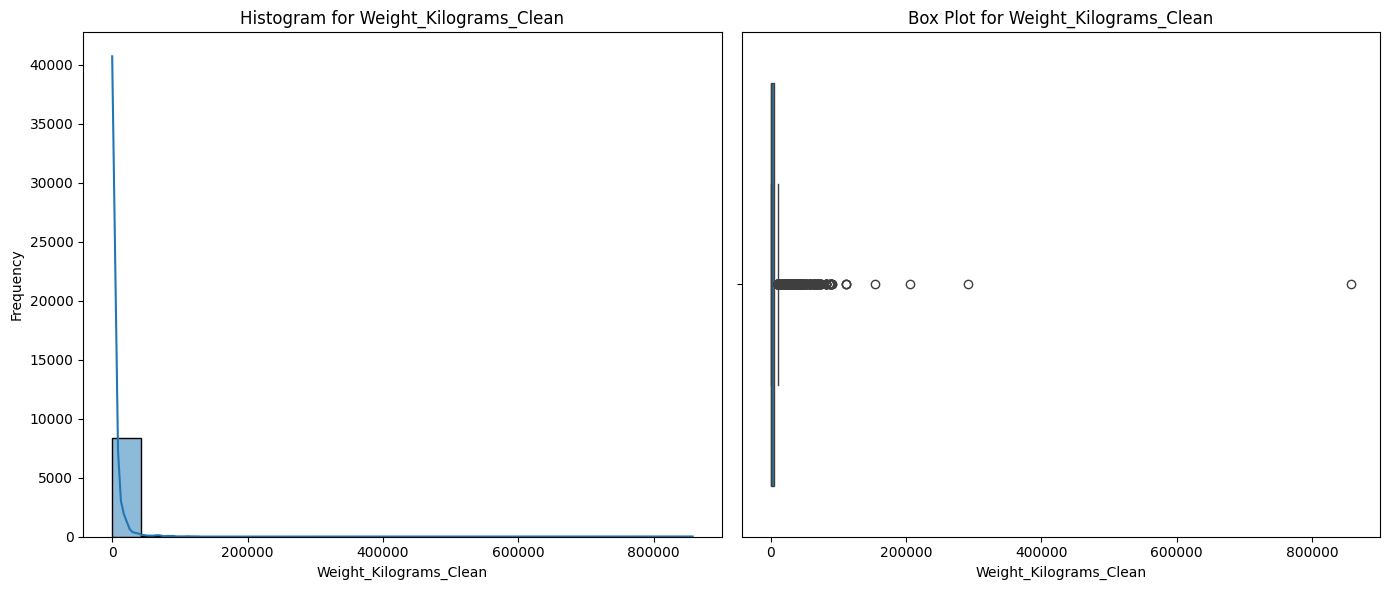

In [152]:
hist_box_plot(data=df, numerical_column="Weight_Kilograms_Clean", bin_count=20)

Weight of the Supplies has Outliers ie.e few suplloes are very heavy 

Numerical Data of this Weight Distribution is Right Skewed 

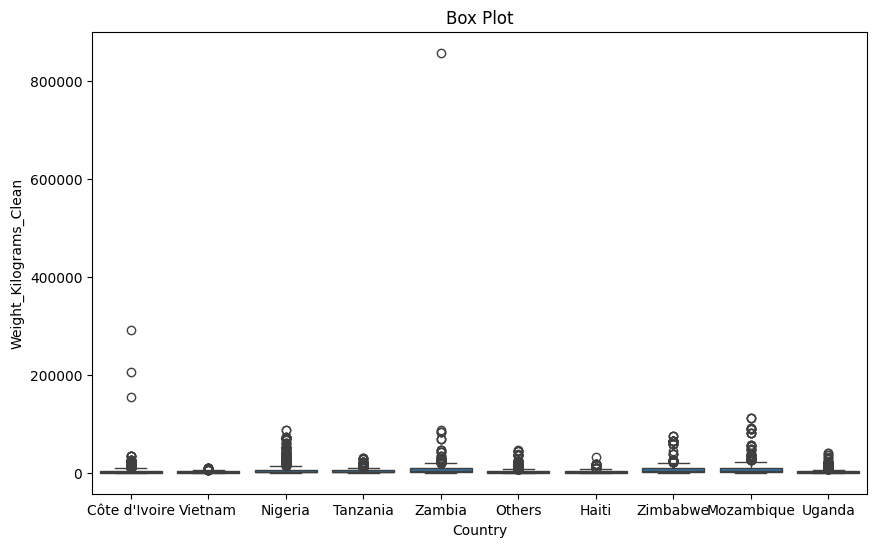

In [153]:
box_plot_categorical_numerical(data=df, categorical_column='Country', numerical_column='Weight_Kilograms_Clean', title='Box Plot')

Heavy Shipments are for Zambia country followed by Mzoambique and Cote d'Ivoire i.e( African countires )are receving HEavy Shipments


In [154]:
def filter_dataframe(data, column_name, category_value):
    """
    Filter a DataFrame based on a specific category in a specified column.

    Parameters:
    - data: pandas DataFrame
    - column_name: Name of the column to filter on
    - category_value: Category value to filter by

    Returns:
    - pandas DataFrame: Filtered DataFrame
    """
    filtered_data = data[data[column_name] != category_value]
    return filtered_data

df_filtered=filter_dataframe(data=df, column_name='Country', category_value='Zambia')

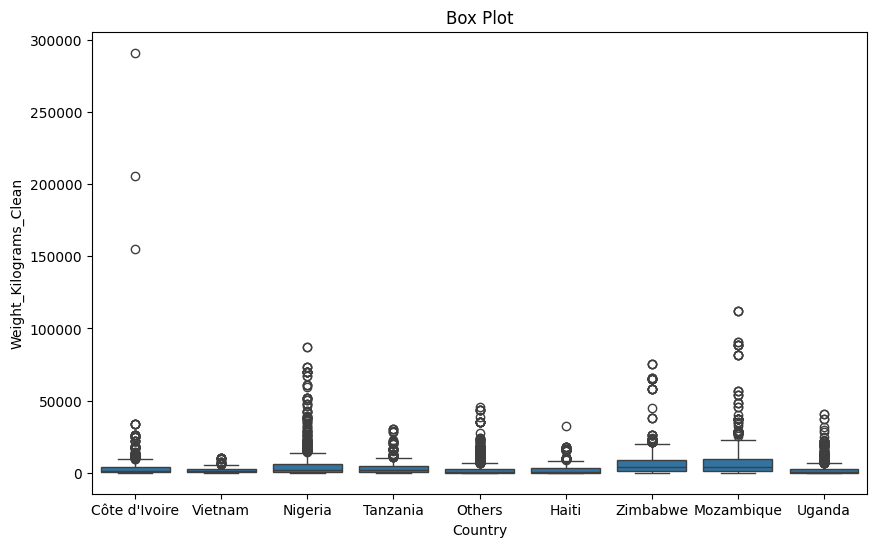

In [155]:
box_plot_categorical_numerical(data=df_filtered, categorical_column='Country', numerical_column='Weight_Kilograms_Clean', title='Box Plot')

Vietnam receives least heavy shipments 
After Haiti 

In [156]:
numerical_columns,categorical_columns=separate_numerical_categorical_columns(df=df)

In [157]:
numerical_columns

['Unit_of_Measure_(Per_Pack)',
 'Line_Item_Quantity',
 'Line_Item_Value',
 'Pack_Price',
 'Unit_Price',
 'Line_Item_Insurance_(USD)',
 'Freight_Cost_USD_Clean',
 'Weight_Kilograms_Clean']

In [158]:
price_detaiks=['Pack_Price','Unit_Price']

##### Line Item Details

In [159]:
line_item_Details=['Line_Item_Quantity',
 'Line_Item_Value','Line_Item_Insurance_(USD)']

In [160]:
df[line_item_Details]

,Line_Item_Quantity,Line_Item_Value,Line_Item_Insurance_(USD)
0,19,551.00,47.04
1,1000,6200.00,47.04
2,500,40000.00,47.04
3,31920,127360.80,47.04
4,38000,121600.00,47.04
...,...,...,...
10316,15000,97800.00,115.11
10317,6724,20978.88,24.69
10318,205243,738874.80,869.66
10319,166571,599655.60,705.79


In [161]:
def scatter_plot(data, x_column, y_column):
    """
    Create a scatter plot of two numerical columns in a given dataset.

    Parameters:
    - data: Pandas DataFrame, the dataset containing the columns.
    - x_column: str, the label of the x-axis column.
    - y_column: str, the label of the y-axis column.

    Returns:
    - None (displays the scatter plot).
    """
    try:
        # Ensure the columns exist in the dataset
        if x_column not in data.columns or y_column not in data.columns:
            raise ValueError("Columns not found in the dataset.")
        
        # Create a scatter plot
        plt.figure(figsize=(10, 6))
        plt.scatter(data[x_column], data[y_column], alpha=0.5)
        plt.title(f'Scatter Plot of {x_column} vs {y_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error: {str(e)}")


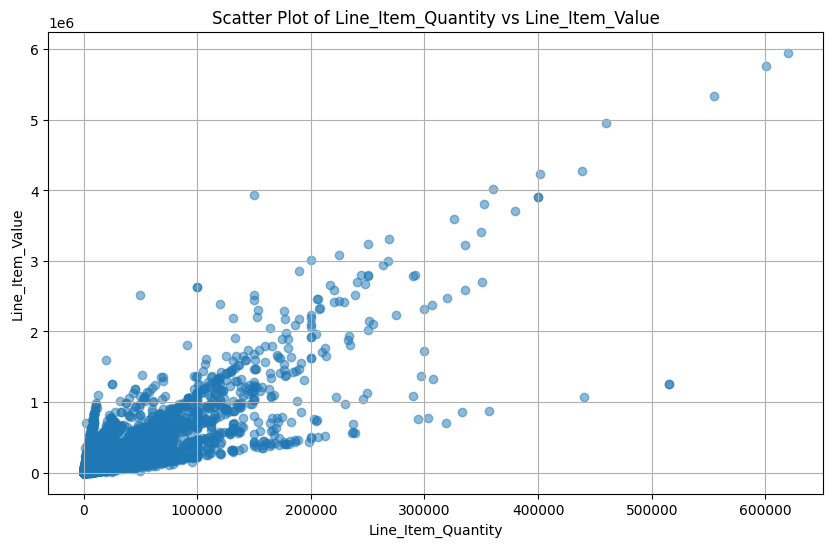

In [162]:
scatter_plot(data=df, x_column='Line_Item_Quantity', y_column='Line_Item_Value')

LIne Item Quanity and Line Item Value are hihly co-related 

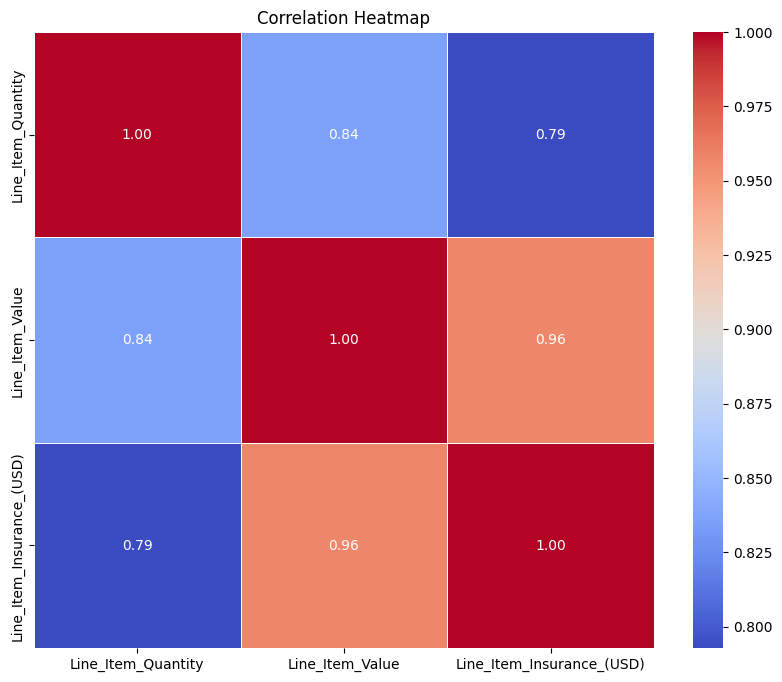

In [163]:
def plot_heatmap(data, columns):
    """
    Create a heatmap of the correlation matrix for specified columns in a given dataset.

    Parameters:
    - data: Pandas DataFrame, the dataset containing the columns.
    - columns: list of str, the labels of the columns for which correlation is to be calculated.

    Returns:
    - None (displays the heatmap).
    """
    try:
        # Ensure the columns exist in the dataset
        missing_columns = [col for col in columns if col not in data.columns]
        if missing_columns:
            raise ValueError(f"Columns not found in the dataset: {missing_columns}")
        
        # Calculate the correlation matrix
        correlation_matrix = data[columns].corr()

        # Create a heatmap using Seaborn
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
        plt.title('Correlation Heatmap')
        plt.show()

    except Exception as e:
        print(f"Error: {str(e)}")

plot_heatmap(data=df, columns=line_item_Details)

Line_Item_Value and Line_Item_Insurance exhibit a strong correlation.

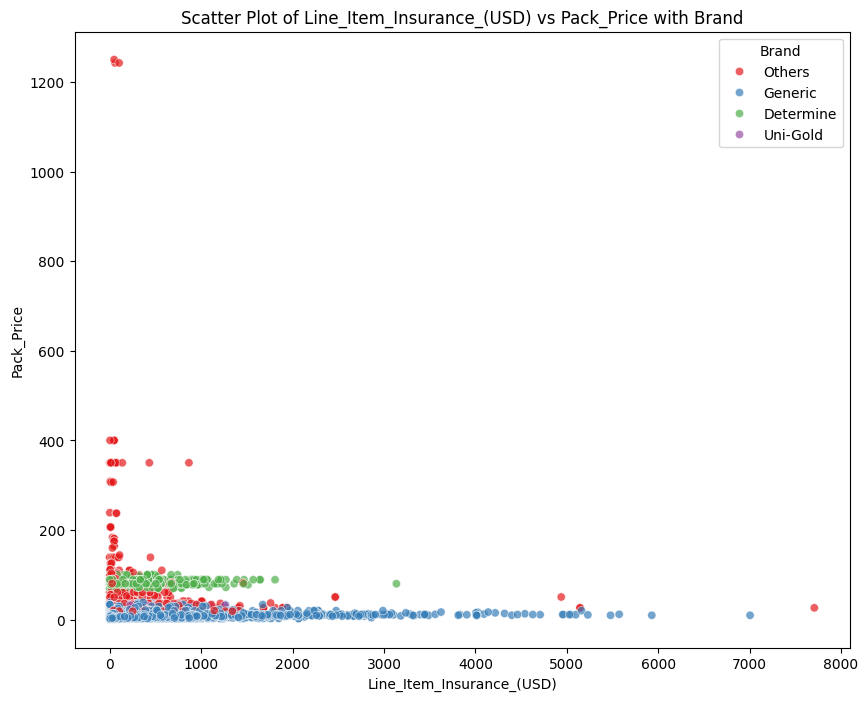

In [164]:
def scatter_plot_with_hue(data, x_column, y_column, hue_column):
    """
    Create a scatter plot with a hue categorical column in a given dataset.

    Parameters:
    - data: Pandas DataFrame, the dataset containing the columns.
    - x_column: str, the label of the x-axis column.
    - y_column: str, the label of the y-axis column.
    - hue_column: str, the label of the hue categorical column.

    Returns:
    - None (displays the scatter plot with hue).
    """
    try:
        # Ensure the columns exist in the dataset
        if x_column not in data.columns or y_column not in data.columns or hue_column not in data.columns:
            raise ValueError("Columns not found in the dataset.")
        
        # Create a scatter plot with hue using Seaborn
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x=x_column, y=y_column, hue=hue_column, data=data, palette='Set1', alpha=0.7)
        plt.title(f'Scatter Plot of {x_column} vs {y_column} with {hue_column}')
        plt.show()

    except Exception as e:
        print(f"Error: {str(e)}")


scatter_plot_with_hue(data=df, x_column='Line_Item_Insurance_(USD)', y_column='Pack_Price', hue_column='Brand')

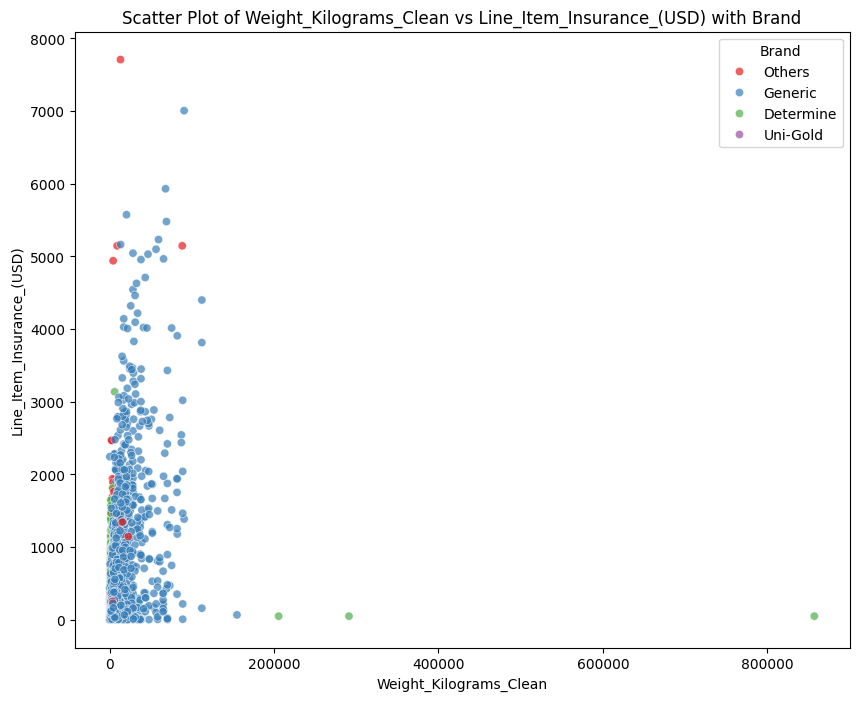

In [165]:
scatter_plot_with_hue(data=df, x_column='Weight_Kilograms_Clean', y_column='Line_Item_Insurance_(USD)', hue_column='Brand')

Quantity of Generic Drugs can be seen supplied in high numbers, and hence, generic drugs typically have better insurance coverage compared to other medications.


##### Target Column Analysis 

In [166]:
df["Freight_Cost_USD_Clean"]

0          780.34
1         4521.50
2         1653.78
3        16007.06
4        45450.08
           ...   
10316     3410.00
10317    47281.56
10318    46111.55
10319    46111.55
10320    14734.92
Name: Freight_Cost_USD_Clean, Length: 8493, dtype: float64

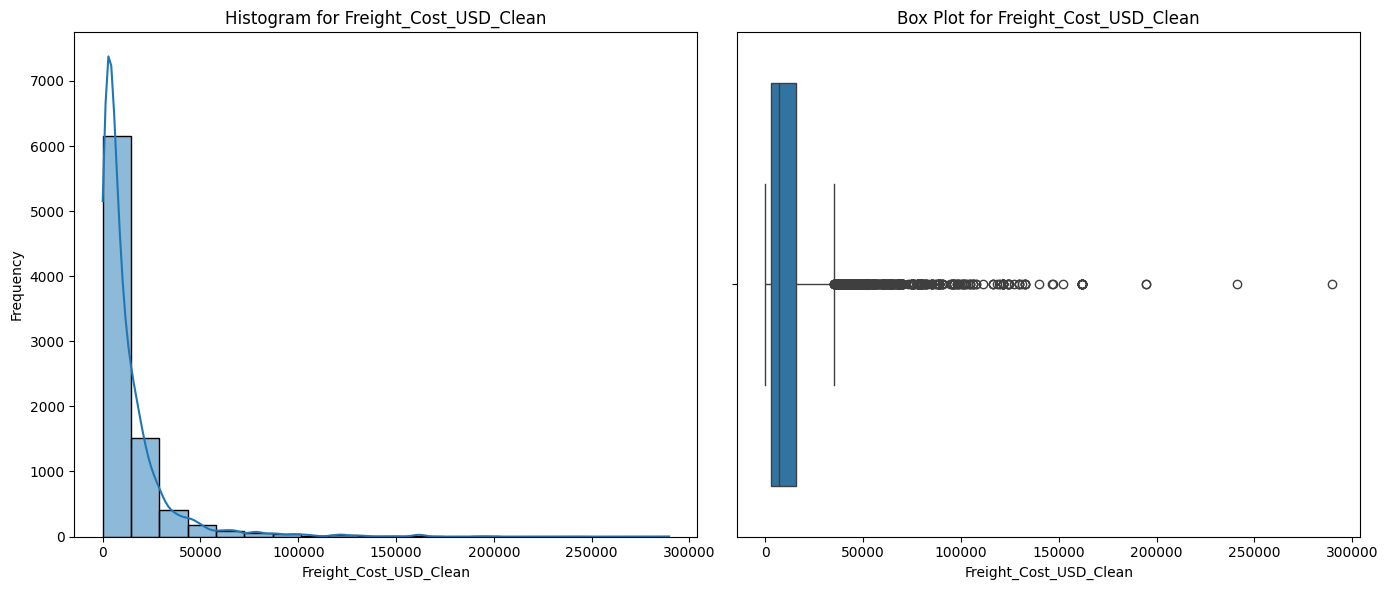

In [167]:
hist_box_plot(data=df,numerical_column='Freight_Cost_USD_Clean')

In [168]:

def box_plot(data, numerical_columns):
    """
    Create box plots for specified numerical columns in a given dataset.

    Parameters:
    - data: Pandas DataFrame, the dataset containing the columns.
    - numerical_columns: list of str, the labels of the numerical columns.

    Returns:
    - None (displays the box plots).
    """
    try:
        # Ensure the columns exist in the dataset
        missing_columns = [col for col in numerical_columns if col not in data.columns]
        if missing_columns:
            raise ValueError(f"Columns not found in the dataset: {missing_columns}")
        
        # Create box plots using Seaborn
        plt.figure(figsize=(12, 8))
        sns.boxplot(data=data[numerical_columns], palette='Set2')
        plt.title('Box Plots for Numerical Columns')
        plt.show()

    except Exception as e:
        print(f"Error: {str(e)}")


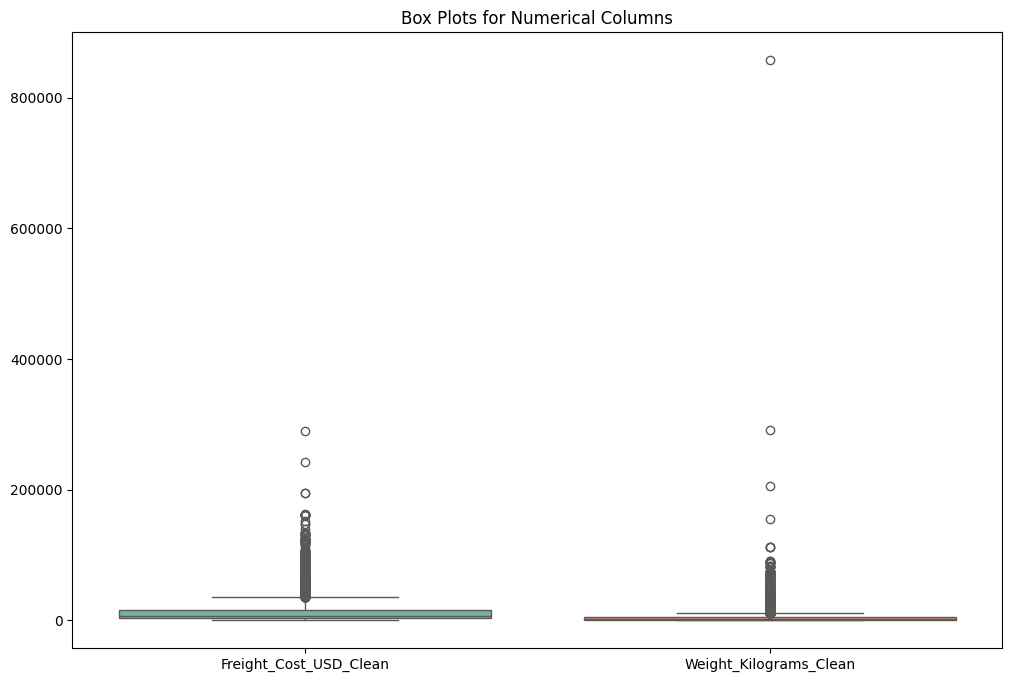

In [169]:
box_plot(data=df, numerical_columns=['Freight_Cost_USD_Clean','Weight_Kilograms_Clean'])

In [170]:
numerical_columns

['Unit_of_Measure_(Per_Pack)',
 'Line_Item_Quantity',
 'Line_Item_Value',
 'Pack_Price',
 'Unit_Price',
 'Line_Item_Insurance_(USD)',
 'Freight_Cost_USD_Clean',
 'Weight_Kilograms_Clean']

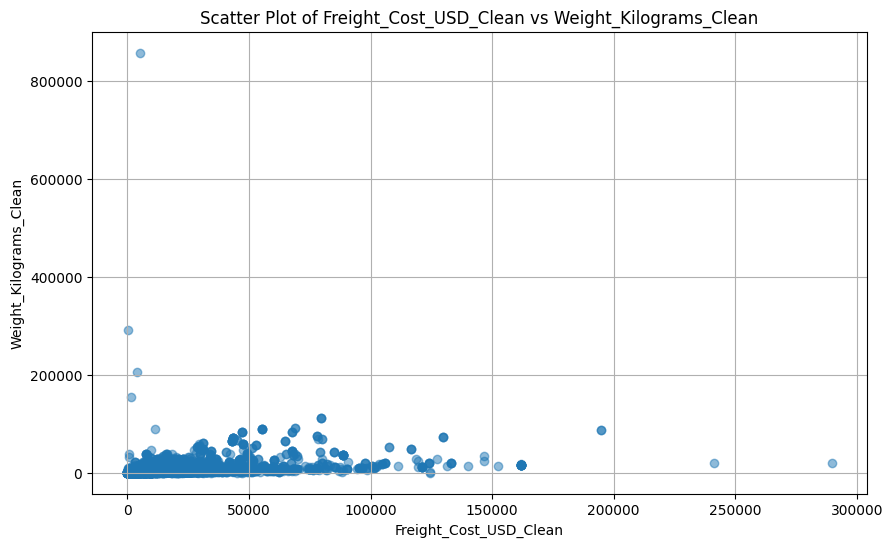

In [171]:
scatter_plot(data=df, x_column='Freight_Cost_USD_Clean', y_column='Weight_Kilograms_Clean')

In [172]:
df['Shipment_Mode']

0                Air
1                Air
2                Air
3                Air
4                Air
            ...     
10316    Air Charter
10317            Air
10318          Truck
10319          Truck
10320          Truck
Name: Shipment_Mode, Length: 8493, dtype: object

In [173]:
df.columns

Index(['Country', 'Managed_By', 'Fulfill_Via', 'Vendor_INCO_Term',
       'Shipment_Mode', 'PQ_First_Sent_to_Client_Date',
       'PO_Sent_to_Vendor_Date', 'Scheduled_Delivery_Date',
       'Delivered_to_Client_Date', 'Delivery_Recorded_Date', 'Product_Group',
       'Sub_Classification', 'Vendor', 'Brand', 'Dosage', 'Dosage_Form',
       'Unit_of_Measure_(Per_Pack)', 'Line_Item_Quantity', 'Line_Item_Value',
       'Pack_Price', 'Unit_Price', 'First_Line_Designation',
       'Line_Item_Insurance_(USD)', 'Freight_Cost_USD_Clean',
       'Weight_Kilograms_Clean', 'Manufacturing_company',
       'Manufacturing_Location'],
      dtype='object')

##### Dropping Date Columns

In [174]:
df=df.drop(columns=['PQ_First_Sent_to_Client_Date',
       'PO_Sent_to_Vendor_Date', 'Scheduled_Delivery_Date',
       'Delivered_to_Client_Date', 'Delivery_Recorded_Date'])

In [175]:
df= df.drop(columns=['Dosage','Manufacturing_company'])


##### Saving Dataframe

In [176]:
import os

In [177]:
def save_dataframe_to_csv(dataframe, folder_name, csv_name):
    """
    Save a DataFrame to a CSV file in the specified folder.

    Parameters:
    - dataframe: pandas DataFrame
    - folder_name: str, name of the folder to save the CSV file
    - csv_name: str, name of the CSV file

    Returns:
    - None
    """
    # Check if the folder exists, if not, create it
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Construct the full path to the CSV file
    csv_path = os.path.join(folder_name, csv_name)

    # Save the DataFrame to CSV
    dataframe.to_csv(csv_path, index=False)

In [178]:
save_dataframe_to_csv(dataframe=df, folder_name="Transformed_Data", csv_name='EDA.csv')